# Obligatorio TAD

* 315622: Juan Assandri

* 338835: Oliver Kaminski

* 208166: Felipe Burgos

## Introduccion

En el mundo de los negocios las empresas compiten diariamente para brindar la oferta de
sus servicios mejor de lo que su competidor hace, buscando aumentar sus ingresos y
disminuir sus costos, tratando de mantener una oferta vigente según las leyes de mercado
actual e incluso con miras y objetivos claros para insertarse en nichos de mercado no
explotados o simplemente expandiéndose o desarrollándose en los actuales.

PedidosYa no es la excepción a lo que cualquier otra empresa busca, maximizar sus
ganancias, se encuentra en un proceso de expansión con un objetivo claro en su estrategia
de crecimiento, desarrollando su verticalidad en diferentes sectores. Su modelo de ingresos
se basa en comisiones, por lo que, a mayor cantidad de órdenes, mayor será su ingreso.
Actualmente, el comportamiento de negocio en la rama de restaurantes muestra dos franjas
horarias con alta demanda, uno al mediodía y otro por la noche. Para suavizar estos picos y
aumentar la demanda en horarios de menor volumen de pedidos, se han incorporado
supermercados y otros sectores. Uno de los principales desafíos es mantener los altos costos
de la plataforma, para esto la empresa busca optimizar la logística y así mejorar la
rentabilidad, con un enfoque en el desarrollo de la vertical de supermercados. Esta estrategia
no solo busca distribuir mejor los costos, sino también aumentar la cantidad de compras de
cada usuario y mejorar su experiencia general en la plataforma.

Entender y clasificar los diferentes tipos de órdenes es fundamental para cualquier empresa,
ya que permite diversificar su oferta de productos y servicios de manera efectiva. Como
resultado, la empresa puede incrementar su base de usuarios y generar más oportunidades
de ingresos.

Además, con una buena clasificación de los tipos de órdenes, se logra una segmentación de
mercado mucho más efectiva y una comprensión mayor del comportamiento del cliente. Con
esta información, las empresas pueden diseñar campañas de marketing y promociones
personalizadas que resuenen mejor con cada consumidor del servicio.
Ofrecer experiencias de compra adaptadas a las necesidades específicas de cada tipo de
orden aumenta considerablemente la satisfacción y la fidelidad de los clientes.
Para PedidosYa, identificar y analizar diferentes tipos de órdenes en la vertical de
supermercados es crucial para potenciar esta línea de negocio. Entender estos patrones de
compra permite a PedidosYa ajustar su oferta de productos, asegurando que siempre haya
un surtido relevante y conveniente disponible para sus usuarios. Además, al comprender los
diferentes tipos de órdenes, PedidosYa puede identificar áreas con alta demanda que no
están siendo adecuadamente satisfechas.

En conclusión, el desafío de identificar diferentes tipos de órdenes no sólo es fundamental
para mejorar la oferta actual de PedidosYa, sino que también es una estrategia clave para
descubrir nuevas oportunidades de crecimiento y desarrollo en el competitivo sector de
supermercados. Esto permitirá a PedidosYa seguir consolidando su posición en el mercado
y ofrecer un servicio de mayor valor a sus usuarios.

## Objetivo

Identificar diferentes tipos de órdenes para detectar oportunidades de desarrollo del negocio
de supermercados

## Links de referencia


1. **Pandas**: 
   - [Pandas Documentation](https://pandas.pydata.org/docs/)

2. **Seaborn**:
   - [Seaborn Documentation](https://seaborn.pydata.org/)

3. **Matplotlib**:
   - [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)

4. **Scikit-learn**:
   - [Scikit-learn Documentation](https://scikit-learn.org/stable/documentation.html)
   - [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
   - [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
   - [Silhouette Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

5. **Gower**:
   - [Gower's Distance](https://github.com/ramhiser/gower)

6. **KMedoids**:
   - [KMedoids Clustering](https://scikit-learn-extra.readthedocs.io/en/latest/generated/sklearn_extra.cluster.KMedoids.html)

7. **Yellowbrick**:
   - [Yellowbrick Documentation](https://www.scikit-yb.org/en/latest/)
   - [KElbowVisualizer](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)
   - [SilhouetteVisualizer](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html)

## Instalacion e importacion de las librerias

In [1]:
#pip install --upgrade pip

In [2]:
#pip cache purge

In [3]:
!pip install scikit-learn-extra
!pip install gower
!pip install kmedoids
!pip install yellowbrick
!pip install matplotlib==3.4.3


In [4]:
import pandas as pd
import os # Obtener directorios de trabajo 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

import gower
from gower import gower_matrix

import kmedoids
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn_extra.cluster import KMedoids



## Seteo de directorio de trabajo

In [5]:
# obtengo el directorio de trabajo actual
os.getcwd()

'/home/jovyan/work/src'

In [6]:
# seteo y verifico el directorio de trabajo en la raíz del proyecto
os.chdir(r'/home/jovyan/work') # se incluye 'r' antes de la dirección para atender adecuadamente a los caracteres especiales

print('El nuevo -actual- directorio de trabajo es: ', os.getcwd())

El nuevo -actual- directorio de trabajo es:  /home/jovyan/work


# Analisis Exploratyorio de los datos

## Importacion de datasets

In [7]:
# Cargar los archivos CSV en dataframes
df1 = pd.read_csv(r'data/dataset1.csv')
df2 = pd.read_csv(r'data/dataset2.csv')


# Analisis Exploratorio de los datos

## Dataframe 1

In [8]:
df1.head()

,order_id,weekday,hour,business_type_name,partner_id,user_id,qty_total_products,total_amount,has_discount
0,ZbyJUv9idjhjMv9qc9PAKIe8d9QqOtR0ZB4yajPGAt4=,Tuesday,23,Kiosks,dtZsgbcbOVA2FQQRxnFBihy3O697FEFX3OsxmeIs7dA=,SvyuKJwQSZ3FLE1kp4hd6w6r0G2Y2rOoVyaPbGzO2ls=,1,8.404327,False
1,FHWMJpivzLpIv2hzISgOqX87SmPPWMVD3Z1xWAqYbxU=,Monday,8,Market,nnnnu1XWZ8/rhXlbuClEzWdIyB6WxqzVU4R1O5WTSvU=,Sw2a18waMqetNdc7gKPPEVfLZICJGkwz69Uxz+gdUb8=,1,27.370810,False
2,PgZPV2+ewV78vSWDOUBpukyZT3JoZPKEhzlNu5qWLTA=,Saturday,23,Kiosks,rmLHOHBXmepAsF/E0hKCWlsHEphxcTeJuOtVsWgzc+E=,Sw5iS5ffSt/y3+kDtdOQbrc7Gan0c8NSEUkIbgZOuPE=,1,13.432194,False
3,MtfRP1Q+Xx1Ox1JYEexxu7x9EOq7KfccMf+PdfY64n4=,Thursday,14,Kiosks,vXtLI7qWnGDd4ZTQOiZJZ/wQXXY1GLgkEE+pErgYcCc=,SwE0/imkcz2Ws75JXdlGR117JNK3BiFLkwMkrJLbZbo=,1,8.049295,False
4,TMelBjTKbPOk5KQKhFQ23fmUCL++Emdo792rQCWwLns=,Friday,21,Market,CX5eIMrz9/Vk6rPyka9r0Yhnf6MtJyS02BOU2JlXl3M=,SwFxPMx2bMVcPOYsQhlAAhqG4//pL5dDTdWyfVJ7KjY=,1,21.998182,False


**Estructura y Tamaño del DataFrame**

El comando print("Shape of data orders:", df1.shape) muestra el tamaño del DataFrame, mientras que df1.info() proporciona detalles sobre el tipo de datos y la cantidad de valores no nulos en cada columna.

In [9]:
print("Shape of data orders:",df1.shape)
df1.info()

Shape of data orders: (1140899, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140899 entries, 0 to 1140898
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   order_id            1140899 non-null  object 
 1   weekday             1140899 non-null  object 
 2   hour                1140899 non-null  int64  
 3   business_type_name  1140899 non-null  object 
 4   partner_id          1140899 non-null  object 
 5   user_id             1140899 non-null  object 
 6   qty_total_products  1140899 non-null  int64  
 7   total_amount        1140899 non-null  float64
 8   has_discount        1140899 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 70.7+ MB


**Análisis Complementario de la Distribución de Datos mediante Boxplots y Resumen Estadístico**

Los boxplots, en conjunto con el resumen estadístico de las variables numéricas, proporcionan una visión integral de la distribución de los datos. Los boxplots ilustran la mediana, los cuartiles y los valores atípicos de las distribuciones de qty_total_products y total_amount. Estos gráficos ayudan a identificar rápidamente la dispersión y la presencia de valores extremos, complementando las estadísticas descriptivas que detallan la media, desviación estándar y percentiles. En el caso de los datos presentados, ambos métodos evidencian que existen valores atípicos significativos, lo cual es crucial para decisiones sobre el tratamiento de estos valores en análisis posteriores.

Aqui observamos que existen valores atipicos quer podriamos tratar antes de nustro analisis final

In [10]:
# Para forzar que no se muestre en notación cientifica
pd.options.display.float_format = '{:.2f}'.format

df1.describe(percentiles=[.25, .5, .75, 0.99])

,hour,qty_total_products,total_amount
count,1140899.00,1140899.00,1140899.00
mean,16.18,8.42,28.01
std,4.30,7.36,25.09
min,0.00,1.00,0.00
25%,13.00,4.00,13.18
50%,17.00,7.00,19.66
75%,20.00,11.00,33.66
99%,23.00,38.00,128.01
max,23.00,97.00,611.78


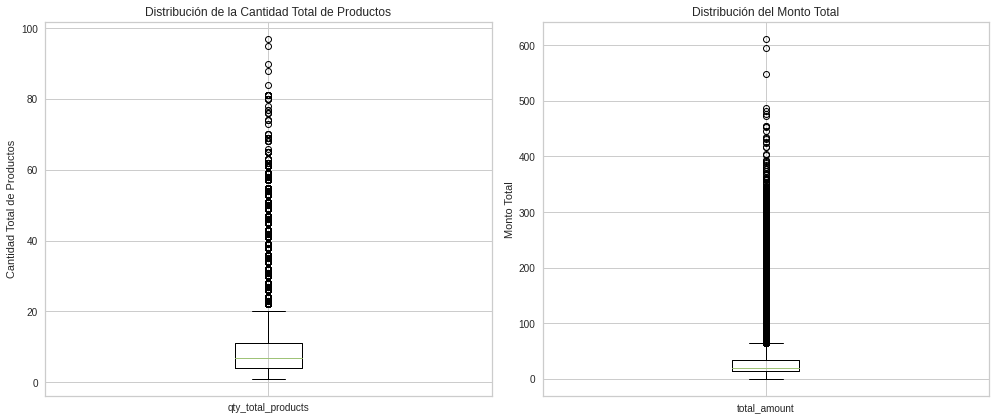

In [11]:
# Crear una figura con dos subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Crear box plot para 'qty_total_products'
axs[0].boxplot(df1['qty_total_products'])
axs[0].set_title('Distribución de la Cantidad Total de Productos')
axs[0].set_ylabel('Cantidad Total de Productos')
axs[0].set_xticks([1])
axs[0].set_xticklabels(['qty_total_products'])

# Crear box plot para 'total_amount'
axs[1].boxplot(df1['total_amount'])
axs[1].set_title('Distribución del Monto Total')
axs[1].set_ylabel('Monto Total')
axs[1].set_xticks([1])
axs[1].set_xticklabels(['total_amount'])

# Ajustar el layout
plt.tight_layout()

# Mostrar la gráfica
plt.show()

**Análisis Descriptivo de Variables Categóricas y Booleanas**

resumen estadístico para las columnas categóricas y booleanas del DataFrame, mostrando el conteo, número de valores únicos, valor más frecuente (moda) y su frecuencia. Este análisis ayuda a identificar la distribución de categorías y la prevalencia de ciertos valores, como se observa en las columnas order_id, weekday, business_type_name, partner_id, user_id y has_discount.

Descripción de los Resultados:

- order_id: Cada pedido tiene un identificador único (unique=1140899).
- weekday: Hay 7 días de la semana, con el sábado siendo el más común (freq=173061).
- business_type_name: Hay 3 tipos de negocios, siendo el mercado (Market) el más frecuente (freq=896193).
- partner_id: Hay 3367 socios, con el socio más frecuente teniendo 19045 órdenes.
- user_id: Existen 199999 usuarios únicos, con el más frecuente teniendo 302 órdenes.
- has_discount: Es una variable booleana con 2 valores (True y False), siendo True el valor más común (freq=731184).

In [12]:
df1.describe(include=['object', 'bool'])

,order_id,weekday,business_type_name,partner_id,user_id,has_discount
count,1140899,1140899,1140899,1140899,1140899,1140899
unique,1140899,7,3,3367,199999,2
top,ZbyJUv9idjhjMv9qc9PAKIe8d9QqOtR0ZB4yajPGAt4=,Saturday,Market,CSq+DtmiVKcNLprPiiWNTgH5sg97DimLHyswaz3tA5M=,Hm0t3URT7FulDsq9V00Rw7lpy/PLY2K2BFnTTjaiLbY=,True
freq,1,173061,896193,19045,302,731184


**Convertir la columna 'weekday'y 'business_type_name' a tipo categórico**

In [13]:
# Convertir la columna 'weekday'y 'business_type_name' a tipo categórico
df1['weekday'] = df1['weekday'].astype('category')
df1['business_type_name'] = df1['business_type_name'].astype('category')

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140899 entries, 0 to 1140898
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   order_id            1140899 non-null  object  
 1   weekday             1140899 non-null  category
 2   hour                1140899 non-null  int64   
 3   business_type_name  1140899 non-null  category
 4   partner_id          1140899 non-null  object  
 5   user_id             1140899 non-null  object  
 6   qty_total_products  1140899 non-null  int64   
 7   total_amount        1140899 non-null  float64 
 8   has_discount        1140899 non-null  bool    
dtypes: bool(1), category(2), float64(1), int64(2), object(3)
memory usage: 55.5+ MB


In [15]:
df1['weekday'].cat.categories

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [16]:
df1['business_type_name'].cat.categories

Index(['Kiosks', 'Market', 'Shop'], dtype='object')

**Distribución de Órdenes por Tipo de Negocio**

El agrupamiento por business_type_name y el conteo de órdenes en cada grupo proporcionan una visión clara de la cantidad de órdenes asociadas a cada tipo de negocio. 

Los resultados indican que la mayoría de las órdenes provienen de Markets (896,193), seguidas de Kiosks (244,608) y Shops (98). Esta variación significativa en la cantidad de órdenes sugiere que hay patrones de consumo distintos entre los tipos de negocio, lo cual es favorable para la clusterización. 

In [17]:
# Agrupar por 'business_type_name' y contar la cantidad de órdenes en cada grupo
resumen_tipo_negocio = df1.groupby('business_type_name').agg(
    cantidad=('business_type_name', 'count')
).reset_index()

# Mostrar los primeros 100 registros del resultado
print(resumen_tipo_negocio.head(100))

  business_type_name  cantidad
0             Kiosks    244608
1             Market    896193
2               Shop        98


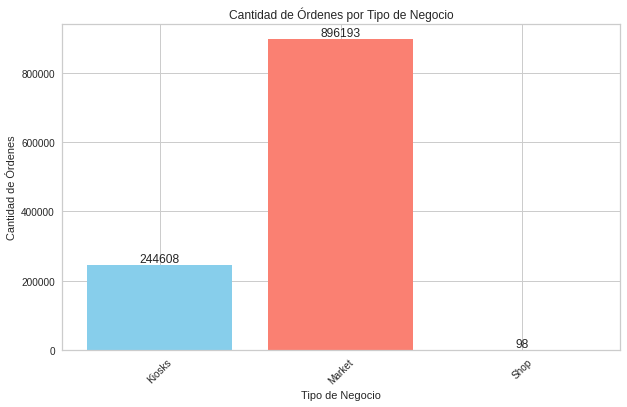

In [18]:
# Crear una gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(resumen_tipo_negocio['business_type_name'], resumen_tipo_negocio['cantidad'], color=['skyblue', 'salmon', 'lightgreen'])
plt.xlabel('Tipo de Negocio')
plt.ylabel('Cantidad de Órdenes')
plt.title('Cantidad de Órdenes por Tipo de Negocio')
plt.xticks(rotation=45)

# Mostrar los valores en las barras
for index, value in enumerate(resumen_tipo_negocio['cantidad']):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Mostrar la gráfica
plt.show()

**Análisis de Órdenes con y sin Descuento**

El análisis de la distribución de órdenes según el uso de descuentos proporciona una visión clara de cómo los descuentos afectan el comportamiento de compra de los clientes.Estos resultados son favorables para la clusterización porque permiten segmentar a los clientes en grupos basados en su sensibilidad a los descuentos. Esta información puede ser utilizada para crear clusters que diferencien entre compradores regulares y aquellos que compran principalmente cuando hay descuentos, optimizando así las campañas de marketing y promociones personalizadas.

Este análisis muestra que una proporción significativa de las órdenes (731,184) utilizan descuentos, lo cual es más del doble de las órdenes sin descuento. Esto indica que los descuentos son un factor importante en la decisión de compra de los clientes

In [19]:
# Agrupar por 'has_discount' y contar la cantidad de órdenes en cada grupo
resumen_descuento = df1.groupby('has_discount').agg(
    cantidad=('has_discount', 'count')
).reset_index()

# Mostrar los primeros 100 registros del resultado (aunque en este caso, probablemente solo haya 2)
print(resumen_descuento.head(100))

   has_discount  cantidad
0         False    409715
1          True    731184


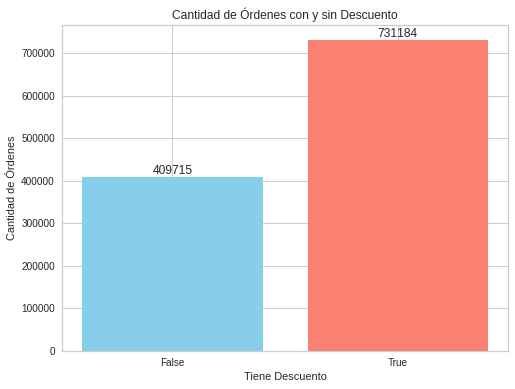

In [20]:
# Crear una gráfica de barras
plt.figure(figsize=(8, 6))
plt.bar(resumen_descuento['has_discount'].astype(str), resumen_descuento['cantidad'], color=['skyblue', 'salmon'])
plt.xlabel('Tiene Descuento')
plt.ylabel('Cantidad de Órdenes')
plt.title('Cantidad de Órdenes con y sin Descuento')
plt.xticks(rotation=0)

# Mostrar los valores en las barras
for index, value in enumerate(resumen_descuento['cantidad']):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Mostrar la gráfica
plt.show()

**Distribución de Órdenes por Día de la Semana**

El análisis de la distribución de órdenes por día de la semana revela el patrón de actividad de los clientes y ayuda a identificar los días de mayor y menor demanda.

Los resultados indican que, aunque hay ligeras variaciones, la cantidad de órdenes es relativamente similar cada día de la semana. El día con mayor cantidad de órdenes es el sábado (173,061) y el día con menor cantidad es el jueves (155,546), pero la diferencia no es muy significativa.

La consistencia en el volumen de órdenes por día de la semana sugiere que los patrones de compra no varían drásticamente a lo largo de la semana. Sin embargo, esta información puede todavía ser útil para la clusterización, ya que permite segmentar a los clientes según hábitos de compra más sutiles y consistentes, optimizando estrategias de servicio y disponibilidad de productos uniformemente a lo largo de la semana.

In [21]:
df1.groupby('weekday').agg(
    cantidad=('weekday', 'count')
).reset_index().head(100)

,weekday,cantidad
0,Friday,164208
1,Monday,159450
2,Saturday,173061
3,Sunday,164929
4,Thursday,155546
5,Tuesday,166655
6,Wednesday,157050


<AxesSubplot:xlabel='Dia de la semana', ylabel='Cantidad'>

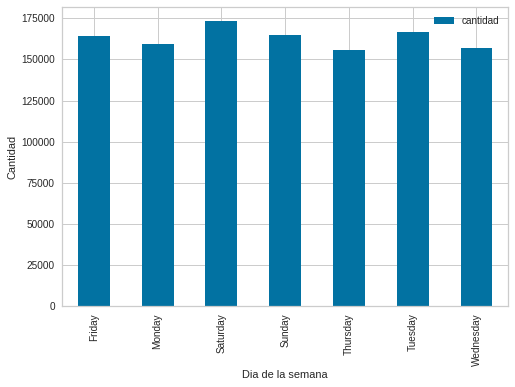

In [22]:
df1.groupby('weekday').agg(
    cantidad=('weekday', 'count')
).plot(kind='bar', xlabel='Dia de la semana', ylabel='Cantidad')

## Dataframe 2

**Estructura y Tamaño del DataFrame**
El comando print("Shape of data orders:", df1.shape) muestra el tamaño del DataFrame, mientras que df1.info() proporciona detalles sobre el tipo de datos y la cantidad de valores no nulos en cada columna.


In [23]:
df2.head()

,order_id,product_id,level_one,level_two
0,ACJR23rpM9HpqSc3pGJ+mq5X9zNFmhSzfSoFVKpteP8=,SArns9ZSXPvbm8OUEhJ2mM3jpYHqzSm2igKfMPEENKs=,Beverages,Water
1,ACJR23rpM9HpqSc3pGJ+mq5X9zNFmhSzfSoFVKpteP8=,H+Bl0ytpbrTPXc1BrleXXvqqsGWfkQMCqVWuBgl1fsU=,Snacks,Confectionary
2,ACJR23rpM9HpqSc3pGJ+mq5X9zNFmhSzfSoFVKpteP8=,5GkVgmMP+Xme/VSAjXpfwlgZanZkMaLQ1IZrb+HHbck=,Beverages,Soft Drinks / Mixers
3,ACJR23rpM9HpqSc3pGJ+mq5X9zNFmhSzfSoFVKpteP8=,rKStVkhTq3jHNteYX+WgrykUVAFDwsnDWBBB5Ccrm44=,Bread / Bakery,Bread
4,ACJR23rpM9HpqSc3pGJ+mq5X9zNFmhSzfSoFVKpteP8=,I4c44vZHw+EGk+OE5NjPDnmWoS+KbBwLy5+VST51eks=,Dairy / Chilled / Eggs,Dairy / Eggs


In [24]:
print("Shape of data orders:",df2.shape)
df2.info()

Shape of data orders: (5036344, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5036344 entries, 0 to 5036343
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   order_id    object
 1   product_id  object
 2   level_one   object
 3   level_two   object
dtypes: object(4)
memory usage: 153.7+ MB


**Análisis Descriptivo de Variables Categóricas y Booleanas**

resumen estadístico para las columnas categóricas y booleanas del DataFrame, mostrando el conteo, número de valores únicos, valor más frecuente (moda) y su frecuencia. Este análisis ayuda a identificar la distribución de categorías y la prevalencia de ciertos valores.

Resultados:

- order_id: 1,129,555 órdenes únicas
- product_id: 898,075 productos únicos
- level_one: 14 categorías únicas
- level_two: 53 subcategorías únicas


- order_id más frecuente: 53 ocurrencias
- product_id más frecuente: 1051 ocurrencias
- level_one más frecuente: Snacks (869,319 ocurrencias)
- level_two más frecuente: Confectionary (682,787 ocurrencias)

Los resultados indican una gran diversidad de productos y categorías, con Snacks y Confectionary siendo las más comunes en sus respectivos niveles.Estos resultados son favorables para la clusterización ya que permiten segmentar los datos según la popularidad y diversidad de los productos.

In [25]:
# Para forzar que no se muestre en notación cientifica
pd.options.display.float_format = '{:.2f}'.format

df2.describe()

,order_id,product_id,level_one,level_two
count,5036344,5036344,5036344,5036344
unique,1129555,898075,14,53
top,eRnrYFqWzICTE8AQuqz8BDMzOTVtMNLUUg02R1d2oM8=,S2Psa75x16XpYY6AIIprddLBHV0F5TsPMIv3odT7AQ0=,Snacks,Confectionary
freq,53,1051,869319,682787


In [26]:
# Convertir la columna 'level_one'y 'level_two' a tipo categórico
df2['level_one'] = df2['level_one'].astype('category')
df2['level_two'] = df2['level_two'].astype('category')

In [27]:
df2['level_one'].cat.categories

Index(['BWS', 'Beverages', 'Bread / Bakery', 'Dairy / Chilled / Eggs',
       'Frozen', 'General Merchandise', 'Home / Pet', 'Meat / Seafood',
       'Packaged Foods', 'Personal Care / Baby / Health', 'Produce',
       'Ready To Consume', 'Smoking / Tobacco', 'Snacks'],
      dtype='object')

In [28]:
df2['level_two'].cat.categories

Index(['Apparel / Footwear / Sports equipment', 'Baby', 'Beer / Cider',
       'Beverages', 'Books / Magazines', 'Bread', 'Breakfast / Spreads',
       'Canned / Jarred / Instant Meals', 'Cleaning / Laundry',
       'Confectionary', 'Cooking / Condiments / Baking / Herbs / Spices',
       'Dairy / Eggs', 'Deli / Snacking', 'Desserts', 'Disposables',
       'E-Cigarettes / Accessories', 'Electronics', 'Fish / Seafood', 'Food',
       'Frozen Convenience / Bakery', 'Frozen Fruit / Vegetables / Potato',
       'Frozen Meat / Seafood', 'Fruit', 'Hardware / Misc', 'Health',
       'Household', 'Ice', 'Ice Cream / Desserts',
       'Juice / Ice Tea / Sports / Energy', 'Meat', 'Milk', 'Other Snacks',
       'Pasta / Rice / Grains', 'Personal Care / Beauty', 'Pet', 'Poultry',
       'Pre-Mixed', 'Prepared F&V / Fresh Herbs', 'Ready Meals',
       'Salty Snacks', 'Seasonal / Occasion', 'Smoking Accessories',
       'Soft Drinks / Mixers', 'Special Diet', 'Specialty', 'Spirits',
       'Sweet Ba

## Seteo de semilla, k_cluster y iteraciones

In [29]:
semilla = 123
k_cluster = 10
iteraciones = 10
tope_range = k_cluster + 1

## Combinacion Left Join Basado en la Columna "order_id" y Eliminar Filas con Valores Nulos

Realizamos un left join entre los DataFrames df1 y df2 utilizando la columna order_id para combinar la información de ambos conjuntos de datos, asegurando que todas las filas de df1 se mantengan. Posteriormente, eliminamos las filas con valores nulos utilizando dropna() para garantizar la integridad y completitud de los datos. Este proceso es crucial para preparar un conjunto de datos limpio y cohesivo, que sea adecuado para análisis posteriores. Eliminar valores nulos ayuda a evitar problemas en análisis y modelos predictivos, asegurando que los resultados sean precisos y significativos.

In [30]:
# Realizar el left join basado en la columna "order_id"
df = pd.merge(df1, df2, on='order_id', how='left')
df = df.dropna()

**Conteo de Registros Distintos de order_id y user_id**

El análisis del número de registros distintos para order_id y user_id proporciona una visión clara de la unicidad de los datos en el DataFrame combinado. Los resultados indican que hay 197,011 órdenes únicas en el conjunto de datos, distribuidas entre 35,078 usuarios distintos. Esto sugiere que, en promedio, cada usuario ha realizado varias órdenes.

In [31]:
df['level_one'] = df['level_one'].astype('object')

In [32]:
# Contar los registros de order_id distintos
num_distinct_order_ids = df['order_id'].nunique()
# Contar los registros de user_id distintos
num_distinct_user_ids = df['user_id'].nunique()
print("Número de registros de order_id distintos:", num_distinct_order_ids)
print("Número de registros de user_id distintos:", num_distinct_user_ids)

Número de registros de order_id distintos: 197011
Número de registros de user_id distintos: 35078


**Estructura y Tamaño del DataFrame**

El comando print("Shape of data orders:", df1.shape) muestra el tamaño del DataFrame, mientras que df1.info() proporciona detalles sobre el tipo de datos y la cantidad de valores no nulos en cada columna.

In [33]:
# Mostrar el resultado
df.head()

,order_id,weekday,hour,business_type_name,partner_id,user_id,qty_total_products,total_amount,has_discount,product_id,level_one,level_two
3,MtfRP1Q+Xx1Ox1JYEexxu7x9EOq7KfccMf+PdfY64n4=,Thursday,14,Kiosks,vXtLI7qWnGDd4ZTQOiZJZ/wQXXY1GLgkEE+pErgYcCc=,SwE0/imkcz2Ws75JXdlGR117JNK3BiFLkwMkrJLbZbo=,1,8.05,False,CNOSao/6N6ofzazjxaKKpNX/uJJmYmRyEwsj0DC8FYM=,Smoking / Tobacco,Tobacco
14,GfUKK9Bh5wBGg+XJuy1E3yYr9kQ4GH+X1EVLe6YbzTg=,Tuesday,0,Kiosks,jm4h8a5ugX13K8EyOwmt3XmFG+tC+GcN9Od0EX8TeLQ=,Sww2v+mY8dtWiMEtMPIEQLAkitFKxKZ0n+84SPBeEG4=,1,7.91,False,KnXqi39yRIczh1FaJo1LSzCJXK7K0ypgFu83U2qq8JY=,Beverages,Soft Drinks / Mixers
15,KH4S+lzxCMKHd6UUOiIo7DuLlDaufLd3raqSHBeibAg=,Wednesday,22,Kiosks,1JhXLeaP56TZ3S0s3L4ze2uF1z6TzLNNG4l+ZjrGGpc=,Sx+OBqNkMZTtqkk7VUjbNa6brwNBsUzbjhLKFMz8yvM=,1,7.85,False,wm+wxfQbe8WeSI0D/2fTWWQ4PYtqLel1kNOx7Ltk/zY=,Beverages,Soft Drinks / Mixers
16,GdvT/R8JqkIOzSzfwVrVag6okmBzO0ms88KxgAseht8=,Saturday,23,Kiosks,bmaUtn62nJYTQWQDGzL/E8Ka06Mx4EhRVVfk5OQwLZQ=,Sx+OBqNkMZTtqkk7VUjbNa6brwNBsUzbjhLKFMz8yvM=,1,8.60,False,6ZvoEhv/vRYiuRQhx477vpGbwLxJYbWAeXyK/yy+kwM=,Smoking / Tobacco,Tobacco
17,jHBgND7nb06oC1b6Ky6aqdqR0bWIKvaBYKMnNrrzaaQ=,Tuesday,14,Kiosks,MLb861rH4PvXNX5DI2ODCQfEX82/0OnwHbRTaCBXD0U=,Sx+s37QMSYEPCq+aeUFvWfJW87qJUZIEFmM4iqy5MXo=,1,8.38,False,N6x+F9p/qU2YCJsTOvSq4JGVrtXKVGstCBjqBIl3Pb4=,Packaged Foods,Cooking / Condiments / Baking / Herbs / Spices


In [34]:
print("Shape of data orders:",df1.shape)
df.info()

Shape of data orders: (1140899, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 873635 entries, 3 to 1817505
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   order_id            873635 non-null  object  
 1   weekday             873635 non-null  category
 2   hour                873635 non-null  int64   
 3   business_type_name  873635 non-null  category
 4   partner_id          873635 non-null  object  
 5   user_id             873635 non-null  object  
 6   qty_total_products  873635 non-null  int64   
 7   total_amount        873635 non-null  float64 
 8   has_discount        873635 non-null  bool    
 9   product_id          873635 non-null  object  
 10  level_one           873635 non-null  object  
 11  level_two           873635 non-null  category
dtypes: bool(1), category(3), float64(1), int64(2), object(5)
memory usage: 63.3+ MB


In [35]:
df.columns

Index(['order_id', 'weekday', 'hour', 'business_type_name', 'partner_id',
       'user_id', 'qty_total_products', 'total_amount', 'has_discount',
       'product_id', 'level_one', 'level_two'],
      dtype='object')

In [36]:
ordenes_por_categoria_df_l1 = df.groupby('level_one').size().reset_index(name='cantidad')

### Análisis de Órdenes por Categoría de Producto en Level One

El gráfico muestra la cantidad de órdenes distribuidas por categoría de producto en level_one, proporcionando una visión clara de las preferencias de los clientes en diferentes categorías.

Los resultados indican que las categorías Snacks, Packaged Foods y Beverages son las más populares entre los clientes. Esto proporciona una comprensión clara de qué productos son más demandados, permitiendo una mejor gestión del inventario y estrategias de marketing específicas.

Estos resultados son favorables para la clusterización ya que permiten segmentar a los clientes según sus preferencias de productos. Identificar categorías más demandadas facilita la creación de clusters basados en hábitos de consumo específicos, optimizando así las ofertas y promociones personalizadas.

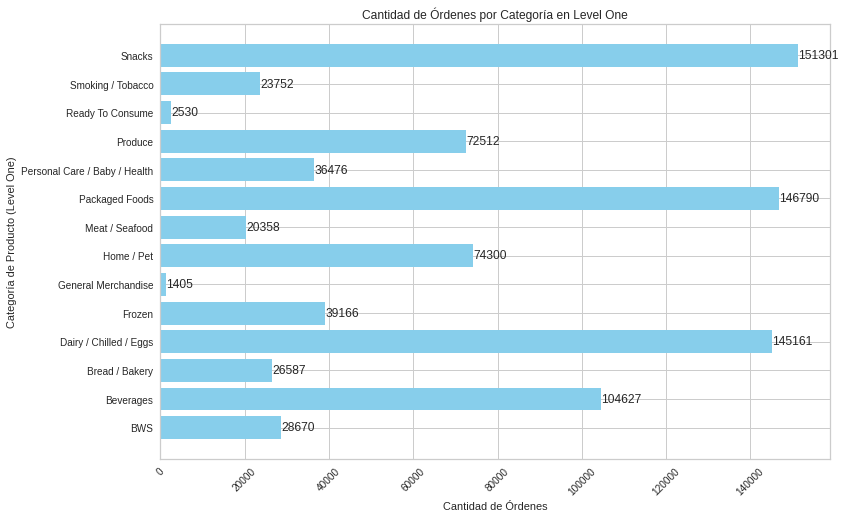

In [37]:
# Crear una gráfica de barras
plt.figure(figsize=(12, 8))
plt.barh(ordenes_por_categoria_df_l1['level_one'], ordenes_por_categoria_df_l1['cantidad'], color='skyblue')
plt.xlabel('Cantidad de Órdenes')
plt.ylabel('Categoría de Producto (Level One)')
plt.title('Cantidad de Órdenes por Categoría en Level One')
plt.xticks(rotation=45)

# Mostrar los valores en las barras
for index, value in enumerate(ordenes_por_categoria_df_l1['cantidad']):
    plt.text(value, index, str(value), va='center')

In [38]:
# Agrupar por 'level_two' y contar la cantidad de órdenes en cada categoría
ordenes_por_categoria_df_l2 = df.groupby('level_two').size().reset_index(name='cantidad')

### Análisis de Órdenes por Categoría de Producto en Level Two

El gráfico muestra la cantidad de órdenes distribuidas por categoría de producto en level_two, proporcionando una visión detallada de las preferencias de los clientes en diferentes subcategorías.

Los resultados indican que las subcategorías Confectionary, Soft Drinks / Mixers, y Water son las más populares entre los clientes. Esto proporciona una comprensión clara de qué productos específicos son más demandados.

Estos resultados son favorables para la clusterización ya que permiten segmentar a los clientes según sus preferencias de productos a un nivel más granular. Identificar subcategorías más demandadas facilita la creación de clusters basados en hábitos de consumo específicos

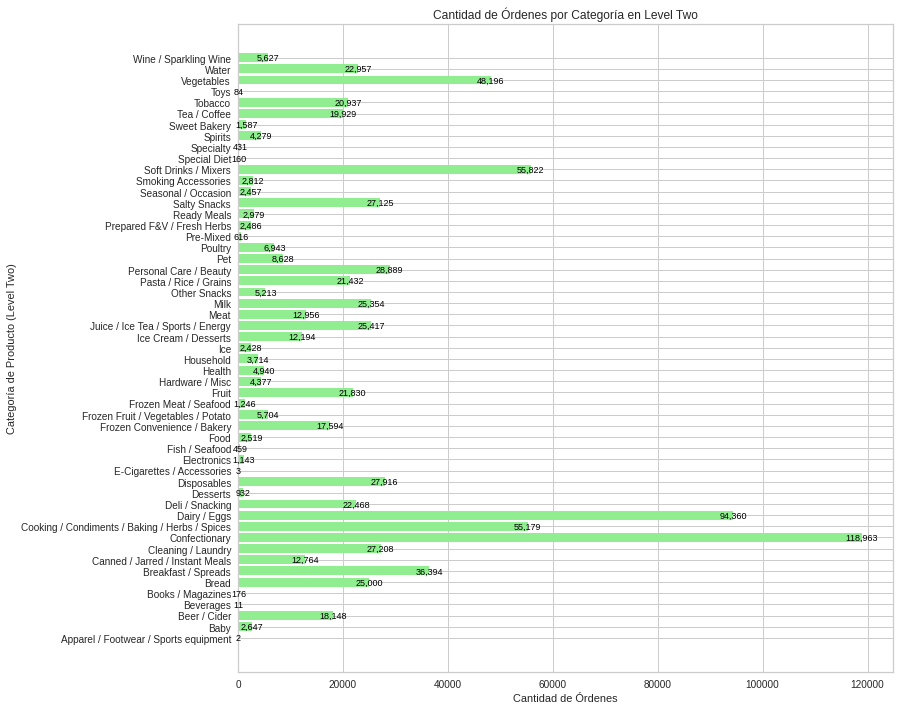

In [39]:
# Crear una gráfica de barras
plt.figure(figsize=(14, 10))

# Crear el gráfico de barras horizontal
bars = plt.barh(ordenes_por_categoria_df_l2['level_two'], ordenes_por_categoria_df_l2['cantidad'], color='lightgreen')

# Configurar las etiquetas del eje x y del eje y
plt.xlabel('Cantidad de Órdenes')
plt.ylabel('Categoría de Producto (Level Two)')

# Configurar el título del gráfico
plt.title('Cantidad de Órdenes por Categoría en Level Two')

# Mostrar los valores en las barras
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width):,}', ha='center', va='center', fontsize=9, color='black')

# Ajustar los márgenes
plt.subplots_adjust(left=0.3, right=0.95, top=0.95, bottom=0.05)

# Mostrar la gráfica
plt.show()

### Análisis de la Matriz de Correlación de Pearson

La matriz de correlación de Pearson proporciona información sobre la relación lineal entre las variables numéricas del DataFrame. Los valores de la correlación oscilan entre -1 y 1, donde 1 indica una correlación positiva perfecta, -1 indica una correlación negativa perfecta, y 0 indica que no hay correlación lineal.

La matriz de correlación de Pearson revela que la cantidad total de productos (qty_total_products) tiene una fuerte correlación positiva con el monto total (total_amount) de las órdenes (0.82), indicando que a mayor cantidad de productos, mayor es el monto total. Además, se observa una correlación moderada positiva de has_discount con qty_total_products (0.25) y total_amount (0.18), sugiriendo que las órdenes con descuentos tienden a tener más productos y un monto total mayor. En contraste, la variable hour no muestra una correlación significativa con ninguna otra variable, indicando que la hora del día no afecta notablemente la cantidad de productos ni el monto total de las órdenes.

Este análisis de la matriz de correlación ayuda a identificar las relaciones entre las variables, proporcionando una base para futuras decisiones en análisis predictivo y estrategias de negocio.

                    hour  qty_total_products  total_amount  has_discount
hour                1.00               -0.09         -0.09          0.01
qty_total_products -0.09                1.00          0.82          0.25
total_amount       -0.09                0.82          1.00          0.18
has_discount        0.01                0.25          0.18          1.00


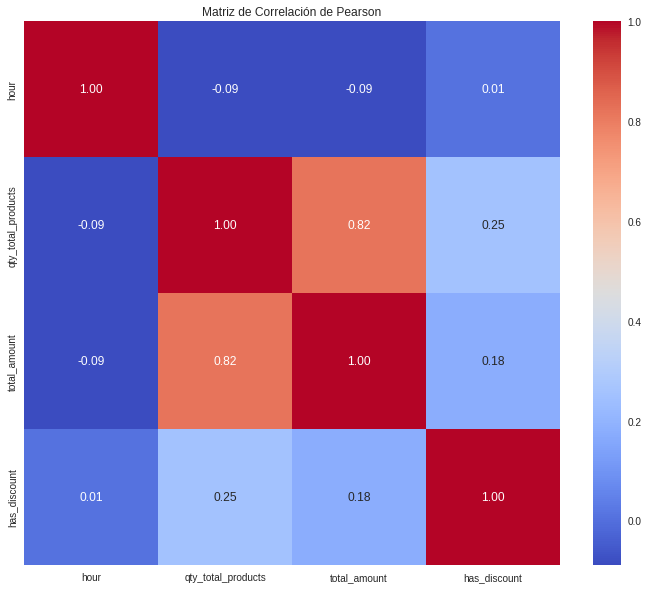

In [40]:
# Calcular la matriz de correlación de Pearson
correlation_matrix = df.corr(method='pearson')

# Mostrar la matriz de correlación
print(correlation_matrix)

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Pearson')
plt.show()

### Análisis del Pairplot

El pairplot proporciona una visualización detallada de las relaciones entre las variables numéricas hour, qty_total_products, y total_amount. Aquí están algunas observaciones clave del gráfico:

Distribución de qty_total_products:

La mayoría de las órdenes contienen menos de 40 productos, con una concentración significativa alrededor de los 10 a 20 productos.
Existen algunos valores atípicos con cantidades mayores, pero estos son menos frecuentes.

Distribución de total_amount:

La mayoría de las órdenes tienen un monto total inferior a 100, con una concentración alrededor de los 20 a 50.
Hay algunos valores atípicos con montos mucho más altos, hasta 600, pero estos son escasos.

Relación entre qty_total_products y total_amount:

Existe una correlación positiva notable entre la cantidad de productos y el monto total de la orden, confirmando la relación lineal observada previamente.

Este análisis visual ayuda a identificar patrones y relaciones entre las variables, confirmando las observaciones obtenidas de la matriz de correlación de Pearson. Los datos parecen consistentes con los patrones esperados y no muestran relaciones inesperadas entre las variables.

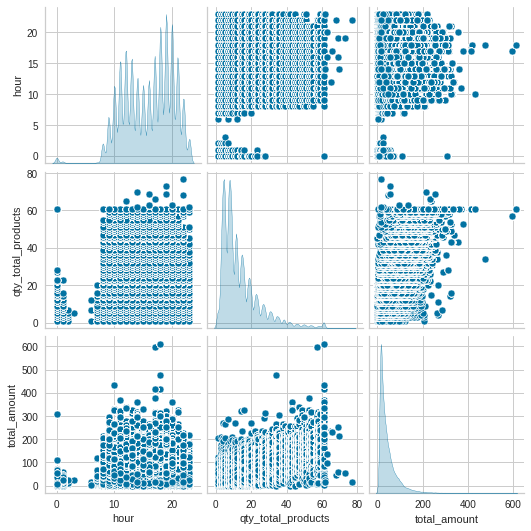

In [41]:
# Seleccionar las columnas numéricas para el pairplot
numerical_columns = ['hour', 'qty_total_products', 'total_amount']

# Crear el pairplot
sns.pairplot(df[numerical_columns], diag_kind='kde')

# Mostrar el plot
plt.show()

## Tratamiento de Outliers 

La eliminación de outliers en las categorías qty_total_products y total_amount se realizó para mejorar la calidad y la fiabilidad del análisis de datos. Los outliers, definidos como valores que superan el percentil 99, pueden distorsionar las estadísticas descriptivas y los modelos predictivos, llevando a conclusiones erróneas. Al eliminar estos valores extremos, se obtiene un conjunto de datos más representativo del comportamiento típico de los usuarios, permitiendo análisis más precisos y significativos. Esta limpieza de datos es crucial para garantizar la integridad de los resultados, facilitando la identificación de patrones y tendencias reales sin la influencia de valores atípicos.

En este caso, se eliminaron 12,516 registros de un total de 873,635, lo cual representa una pequeña fracción (aproximadamente el 1.43%). Aunque se pierden algunos datos, la reducción es mínima y no debería afectar significativamente los resultados generales.

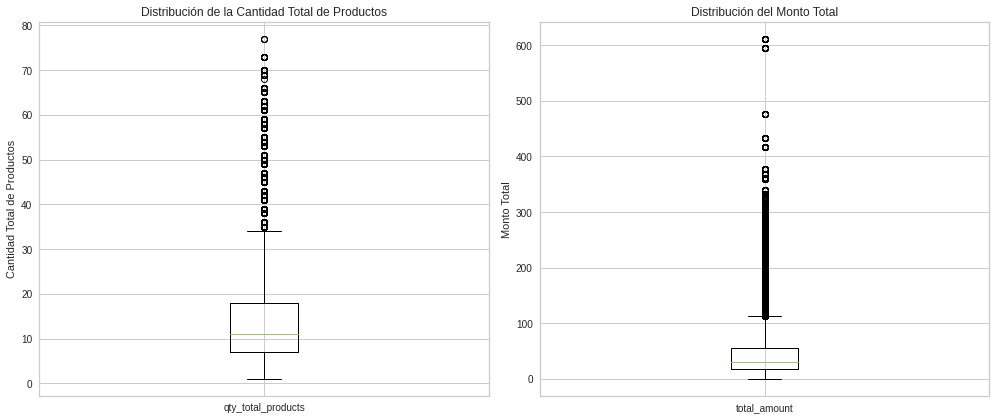

In [42]:
# Crear una figura con dos subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Crear box plot para 'qty_total_products'
axs[0].boxplot(df['qty_total_products'])
axs[0].set_title('Distribución de la Cantidad Total de Productos')
axs[0].set_ylabel('Cantidad Total de Productos')
axs[0].set_xticks([1])
axs[0].set_xticklabels(['qty_total_products'])

# Crear box plot para 'total_amount'
axs[1].boxplot(df['total_amount'])
axs[1].set_title('Distribución del Monto Total')
axs[1].set_ylabel('Monto Total')
axs[1].set_xticks([1])
axs[1].set_xticklabels(['total_amount'])

# Ajustar el layout
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [43]:
# Para forzar que no se muestre en notación cientifica
pd.options.display.float_format = '{:.2f}'.format

df.describe(percentiles=[.25, .5, .75, 0.99])

,hour,qty_total_products,total_amount
count,873635.00,873635.00,873635.00
mean,15.91,13.70,43.14
std,4.10,10.93,39.17
min,0.00,1.00,0.00
25%,12.00,7.00,17.05
50%,17.00,11.00,30.20
75%,19.00,18.00,55.12
99%,23.00,55.00,192.96
max,23.00,77.00,611.78


In [44]:
# Listado de columnas a considerar para los percentiles
columns_to_consider = [ 'qty_total_products', 'total_amount']

# Cálculo del percentil 99 para cada una de estas columnas
percentiles_99 = df[columns_to_consider].quantile(0.99)

# Crear una columna que indique si alguna de estas columnas supera el percentil 99
df['above_99th_percentile'] = df.apply(lambda row: any(row[col] > percentiles_99[col] for col in columns_to_consider), axis=1)

# Contar cuántas órdenes superan el percentil 99 en alguna de estas columnas
orders_above_99th = df['above_99th_percentile'].sum()

print(f"Total de órdenes que superan el percentil 99 en alguna categoría: {orders_above_99th}")

Total de órdenes que superan el percentil 99 en alguna categoría: 12516


In [45]:
# Cálculo del percentil 99.9 para qty_total_products y total_amount
percentile_99_qty_total_products = df['qty_total_products'].quantile(0.99)
percentile_99_total_amount = df['total_amount'].quantile(0.99)

# Filtrar las filas que no superen estos percentiles
df = df[(df['qty_total_products'] <= percentile_99_qty_total_products) & 
                 (df['total_amount'] <= percentile_99_total_amount)]

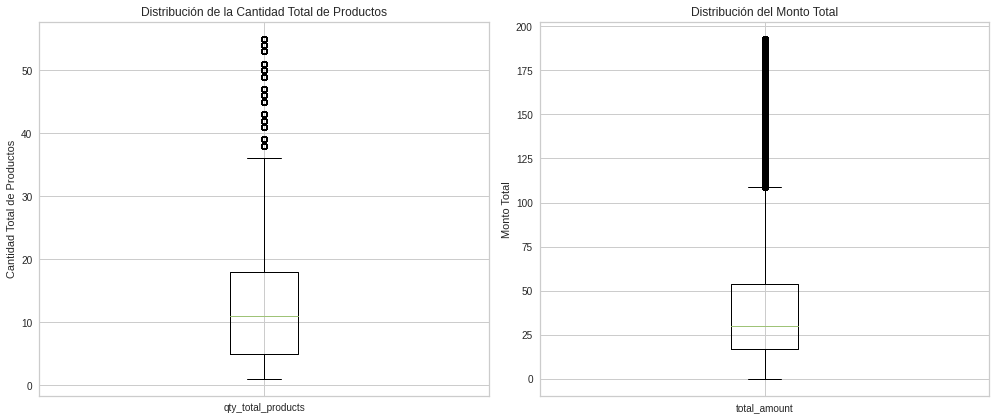

In [46]:
# Crear una figura con dos subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Crear box plot para 'qty_total_products'
axs[0].boxplot(df['qty_total_products'])
axs[0].set_title('Distribución de la Cantidad Total de Productos')
axs[0].set_ylabel('Cantidad Total de Productos')
axs[0].set_xticks([1])
axs[0].set_xticklabels(['qty_total_products'])

# Crear box plot para 'total_amount'
axs[1].boxplot(df['total_amount'])
axs[1].set_title('Distribución del Monto Total')
axs[1].set_ylabel('Monto Total')
axs[1].set_xticks([1])
axs[1].set_xticklabels(['total_amount'])

# Ajustar el layout
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [47]:
# Para forzar que no se muestre en notación cientifica
pd.options.display.float_format = '{:.2f}'.format

df.describe(percentiles=[.25, .5, .75, 0.99])

,hour,qty_total_products,total_amount
count,861119.00,861119.00,861119.00
mean,15.92,13.12,40.74
std,4.10,9.81,33.07
min,0.00,1.00,0.00
25%,12.00,5.00,16.92
50%,17.00,11.00,29.70
75%,19.00,18.00,53.58
99%,23.00,47.00,158.03
max,23.00,55.00,192.96


# Creacion y transormacion de variables

### Creación de Variable "frecuencia de usuario"

En este proceso, se agrupa el DataFrame df por user_id para contar las órdenes únicas (order_id) realizadas por cada usuario, creando así una nueva columna order_count_usu que refleja la frecuencia de uso de cada usuario. Posteriormente, esta información se une de nuevo al DataFrame original, asegurando que cada registro de usuario contenga la cantidad de órdenes realizadas. 

#### Data frame "df" creado a partir del merge del dataset1 y dataset2.

Contabilización de número de órdenes realizada por cada usuario en df

In [48]:
# Agrupar por "user_id" y contar los "order_id" únicos
order_counts = df.groupby('user_id')['order_id'].nunique().reset_index()
order_counts.columns = ['user_id', 'order_count_usu']

# Unir esta información de vuelta al DataFrame original sin generar duplicados
df = df.drop(columns=['order_count_usu'], errors='ignore')  # Elimina la columna existente si existe
df = df.merge(order_counts, on='user_id', how='left')

# Ahora df_inicial tiene una nueva columna "order_count" que muestra cuántas órdenes ha hecho cada usuario
df.head()

,order_id,weekday,hour,business_type_name,partner_id,user_id,qty_total_products,total_amount,has_discount,product_id,level_one,level_two,above_99th_percentile,order_count_usu
0,MtfRP1Q+Xx1Ox1JYEexxu7x9EOq7KfccMf+PdfY64n4=,Thursday,14,Kiosks,vXtLI7qWnGDd4ZTQOiZJZ/wQXXY1GLgkEE+pErgYcCc=,SwE0/imkcz2Ws75JXdlGR117JNK3BiFLkwMkrJLbZbo=,1,8.05,False,CNOSao/6N6ofzazjxaKKpNX/uJJmYmRyEwsj0DC8FYM=,Smoking / Tobacco,Tobacco,False,1
1,GfUKK9Bh5wBGg+XJuy1E3yYr9kQ4GH+X1EVLe6YbzTg=,Tuesday,0,Kiosks,jm4h8a5ugX13K8EyOwmt3XmFG+tC+GcN9Od0EX8TeLQ=,Sww2v+mY8dtWiMEtMPIEQLAkitFKxKZ0n+84SPBeEG4=,1,7.91,False,KnXqi39yRIczh1FaJo1LSzCJXK7K0ypgFu83U2qq8JY=,Beverages,Soft Drinks / Mixers,False,2
2,KH4S+lzxCMKHd6UUOiIo7DuLlDaufLd3raqSHBeibAg=,Wednesday,22,Kiosks,1JhXLeaP56TZ3S0s3L4ze2uF1z6TzLNNG4l+ZjrGGpc=,Sx+OBqNkMZTtqkk7VUjbNa6brwNBsUzbjhLKFMz8yvM=,1,7.85,False,wm+wxfQbe8WeSI0D/2fTWWQ4PYtqLel1kNOx7Ltk/zY=,Beverages,Soft Drinks / Mixers,False,7
3,GdvT/R8JqkIOzSzfwVrVag6okmBzO0ms88KxgAseht8=,Saturday,23,Kiosks,bmaUtn62nJYTQWQDGzL/E8Ka06Mx4EhRVVfk5OQwLZQ=,Sx+OBqNkMZTtqkk7VUjbNa6brwNBsUzbjhLKFMz8yvM=,1,8.60,False,6ZvoEhv/vRYiuRQhx477vpGbwLxJYbWAeXyK/yy+kwM=,Smoking / Tobacco,Tobacco,False,7
4,jHBgND7nb06oC1b6Ky6aqdqR0bWIKvaBYKMnNrrzaaQ=,Tuesday,14,Kiosks,MLb861rH4PvXNX5DI2ODCQfEX82/0OnwHbRTaCBXD0U=,Sx+s37QMSYEPCq+aeUFvWfJW87qJUZIEFmM4iqy5MXo=,1,8.38,False,N6x+F9p/qU2YCJsTOvSq4JGVrtXKVGstCBjqBIl3Pb4=,Packaged Foods,Cooking / Condiments / Baking / Herbs / Spices,False,1


#### Filtro el dataframe por usuario ("user_id") con 35mil filas, creando un nuevo DF llamado "df_usuarios"

Realizamos este filtro para estudiar la frecuencia de compra de los usuarios

In [49]:
# Filtrar el DataFrame por "user_id" únicos
df_usuarios = df.drop_duplicates(subset='user_id', keep='first')

# Mostrar el resultado para verificar
df_usuarios.head()

,order_id,weekday,hour,business_type_name,partner_id,user_id,qty_total_products,total_amount,has_discount,product_id,level_one,level_two,above_99th_percentile,order_count_usu
0,MtfRP1Q+Xx1Ox1JYEexxu7x9EOq7KfccMf+PdfY64n4=,Thursday,14,Kiosks,vXtLI7qWnGDd4ZTQOiZJZ/wQXXY1GLgkEE+pErgYcCc=,SwE0/imkcz2Ws75JXdlGR117JNK3BiFLkwMkrJLbZbo=,1,8.05,False,CNOSao/6N6ofzazjxaKKpNX/uJJmYmRyEwsj0DC8FYM=,Smoking / Tobacco,Tobacco,False,1
1,GfUKK9Bh5wBGg+XJuy1E3yYr9kQ4GH+X1EVLe6YbzTg=,Tuesday,0,Kiosks,jm4h8a5ugX13K8EyOwmt3XmFG+tC+GcN9Od0EX8TeLQ=,Sww2v+mY8dtWiMEtMPIEQLAkitFKxKZ0n+84SPBeEG4=,1,7.91,False,KnXqi39yRIczh1FaJo1LSzCJXK7K0ypgFu83U2qq8JY=,Beverages,Soft Drinks / Mixers,False,2
2,KH4S+lzxCMKHd6UUOiIo7DuLlDaufLd3raqSHBeibAg=,Wednesday,22,Kiosks,1JhXLeaP56TZ3S0s3L4ze2uF1z6TzLNNG4l+ZjrGGpc=,Sx+OBqNkMZTtqkk7VUjbNa6brwNBsUzbjhLKFMz8yvM=,1,7.85,False,wm+wxfQbe8WeSI0D/2fTWWQ4PYtqLel1kNOx7Ltk/zY=,Beverages,Soft Drinks / Mixers,False,7
4,jHBgND7nb06oC1b6Ky6aqdqR0bWIKvaBYKMnNrrzaaQ=,Tuesday,14,Kiosks,MLb861rH4PvXNX5DI2ODCQfEX82/0OnwHbRTaCBXD0U=,Sx+s37QMSYEPCq+aeUFvWfJW87qJUZIEFmM4iqy5MXo=,1,8.38,False,N6x+F9p/qU2YCJsTOvSq4JGVrtXKVGstCBjqBIl3Pb4=,Packaged Foods,Cooking / Condiments / Baking / Herbs / Spices,False,1
5,hL+jTxAdNzCCuKxCpDNOlFAlPCHSE7NsX/GfIGS3+hA=,Friday,13,Kiosks,GthUNOi4W/yXw2XRX/3XsGrwvW5Lj2pz7oAEnRPF7bs=,SxNsmcGgwM+3KXeAbgmqCT+HCuuMBIW2RzgBx2gd3fI=,1,11.09,False,7gsiuBtVkcR6M0IUx0vqrZJE4Bf/3QzQB5ljOyV47+k=,Frozen,Ice Cream / Desserts,False,10


In [50]:
# Obtener el número de filas en el DataFrame df_inicial
num_filas = df_usuarios.shape[0]

# Imprimir el resultado
print("Número de filas en el DataFrame df_inicial:", num_filas)

Número de filas en el DataFrame df_inicial: 35050


count   35050.00
mean        5.61
std        10.70
min         1.00
25%         1.00
50%         2.00
75%         5.00
max       224.00
Name: order_count_usu, dtype: float64


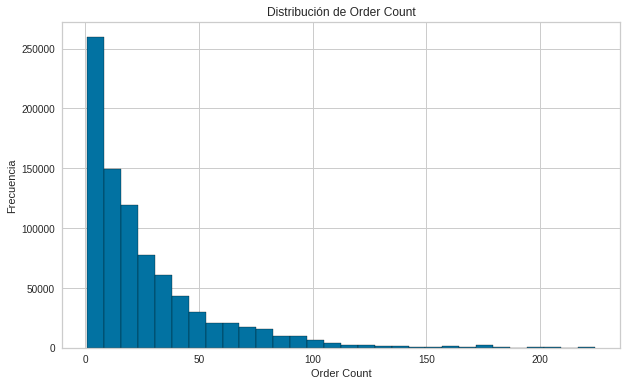

In [51]:
# Estadísticas descriptivas
print(df_usuarios['order_count_usu'].describe())

# Histograma
plt.figure(figsize=(10, 6))
df['order_count_usu'].hist(bins=30, edgecolor='black')
plt.title('Distribución de Order Count')
plt.xlabel('Order Count')
plt.ylabel('Frecuencia')
plt.show()


**Distribución de "order_count" en el dataframe "df_usuarios"**



### Estudiar la distribución de la frecuencia de órdenes **agrupando por usuario (user_id)** me sirve para determinar los rangos de si un usuario ordena con frecuencia "baja" , "media" y "alta".

### Luego lo extrapolo al dataframe agrupado por **"order_id"** realizado un poco más adelate

Si el promedio de órdenes por usuario es 5.62 (redondeo en 6) entonces:

- **frecuencia "baja" menor o igual 3 ordenes** 
- **frecuencia "media" = 4 a 7 ordenes**
- **frecuencia "alta" mayor a 8 ordenes**

**Creacion variable "frec_compra_usu" en categorías "baja", "media" y "alta".**

In [52]:
def categorizar_frecuencia_usuario(X):
    if  X < 4:
        return 'Baja'
    elif X < 8:
        return 'Media'
    else:
        return 'Alta'


In [53]:
df['frec_compra_usu'] = df['order_count_usu'].apply(categorizar_frecuencia_usuario)

### Creación de Variable "FIN DE SEMANA"


En este proceso, se añade una nueva columna al DataFrame df llamada es_fin_de_semana que indica si una orden fue realizada durante el fin de semana. Esta columna es booleana y toma el valor True si el weekday es Saturday o Sunday, y False en caso contrario.

In [54]:
df['es_fin_de_semana'] = (df['weekday'] == 'Saturday') | (df['weekday'] == 'Sunday')
df

,order_id,weekday,hour,business_type_name,partner_id,user_id,qty_total_products,total_amount,has_discount,product_id,level_one,level_two,above_99th_percentile,order_count_usu,frec_compra_usu,es_fin_de_semana
0,MtfRP1Q+Xx1Ox1JYEexxu7x9EOq7KfccMf+PdfY64n4=,Thursday,14,Kiosks,vXtLI7qWnGDd4ZTQOiZJZ/wQXXY1GLgkEE+pErgYcCc=,SwE0/imkcz2Ws75JXdlGR117JNK3BiFLkwMkrJLbZbo=,1,8.05,False,CNOSao/6N6ofzazjxaKKpNX/uJJmYmRyEwsj0DC8FYM=,Smoking / Tobacco,Tobacco,False,1,Baja,False
1,GfUKK9Bh5wBGg+XJuy1E3yYr9kQ4GH+X1EVLe6YbzTg=,Tuesday,0,Kiosks,jm4h8a5ugX13K8EyOwmt3XmFG+tC+GcN9Od0EX8TeLQ=,Sww2v+mY8dtWiMEtMPIEQLAkitFKxKZ0n+84SPBeEG4=,1,7.91,False,KnXqi39yRIczh1FaJo1LSzCJXK7K0ypgFu83U2qq8JY=,Beverages,Soft Drinks / Mixers,False,2,Baja,False
2,KH4S+lzxCMKHd6UUOiIo7DuLlDaufLd3raqSHBeibAg=,Wednesday,22,Kiosks,1JhXLeaP56TZ3S0s3L4ze2uF1z6TzLNNG4l+ZjrGGpc=,Sx+OBqNkMZTtqkk7VUjbNa6brwNBsUzbjhLKFMz8yvM=,1,7.85,False,wm+wxfQbe8WeSI0D/2fTWWQ4PYtqLel1kNOx7Ltk/zY=,Beverages,Soft Drinks / Mixers,False,7,Media,False
3,GdvT/R8JqkIOzSzfwVrVag6okmBzO0ms88KxgAseht8=,Saturday,23,Kiosks,bmaUtn62nJYTQWQDGzL/E8Ka06Mx4EhRVVfk5OQwLZQ=,Sx+OBqNkMZTtqkk7VUjbNa6brwNBsUzbjhLKFMz8yvM=,1,8.60,False,6ZvoEhv/vRYiuRQhx477vpGbwLxJYbWAeXyK/yy+kwM=,Smoking / Tobacco,Tobacco,False,7,Media,True
4,jHBgND7nb06oC1b6Ky6aqdqR0bWIKvaBYKMnNrrzaaQ=,Tuesday,14,Kiosks,MLb861rH4PvXNX5DI2ODCQfEX82/0OnwHbRTaCBXD0U=,Sx+s37QMSYEPCq+aeUFvWfJW87qJUZIEFmM4iqy5MXo=,1,8.38,False,N6x+F9p/qU2YCJsTOvSq4JGVrtXKVGstCBjqBIl3Pb4=,Packaged Foods,Cooking / Condiments / Baking / Herbs / Spices,False,1,Baja,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861114,6MQ1m73q6Mx8k+qhMpF2Zh/C7CJi8cDNLoAfNpBSIFY=,Tuesday,19,Market,w8O/LqbK5VCkpQtOieRFkAUljGjuQLLajrQpLWgWBtI=,D9mUJIqcA3+ZKJKMRZ9gHW5a7tUaHIk8sWy1a7ZidLE=,55,188.96,True,JUUVnWbr1jinwynRlQ+rlUcMVXnC1kgGYJDv7wGfo0g=,Dairy / Chilled / Eggs,Dairy / Eggs,False,30,Alta,False
861115,6MQ1m73q6Mx8k+qhMpF2Zh/C7CJi8cDNLoAfNpBSIFY=,Tuesday,19,Market,w8O/LqbK5VCkpQtOieRFkAUljGjuQLLajrQpLWgWBtI=,D9mUJIqcA3+ZKJKMRZ9gHW5a7tUaHIk8sWy1a7ZidLE=,55,188.96,True,ClmfhpzVp8klHEsrvk2841wzeyrWn40LeYBal3vsDhQ=,Packaged Foods,Canned / Jarred / Instant Meals,False,30,Alta,False
861116,6MQ1m73q6Mx8k+qhMpF2Zh/C7CJi8cDNLoAfNpBSIFY=,Tuesday,19,Market,w8O/LqbK5VCkpQtOieRFkAUljGjuQLLajrQpLWgWBtI=,D9mUJIqcA3+ZKJKMRZ9gHW5a7tUaHIk8sWy1a7ZidLE=,55,188.96,True,uHPCywTapMdvyfKa4yipz4fkDOIDn/5DUtLf2udaq5g=,Bread / Bakery,Bread,False,30,Alta,False
861117,6MQ1m73q6Mx8k+qhMpF2Zh/C7CJi8cDNLoAfNpBSIFY=,Tuesday,19,Market,w8O/LqbK5VCkpQtOieRFkAUljGjuQLLajrQpLWgWBtI=,D9mUJIqcA3+ZKJKMRZ9gHW5a7tUaHIk8sWy1a7ZidLE=,55,188.96,True,c9swUHHVuB7jNLPPJ3hvlGeo011ATs4riQ2JTsLQR+s=,Packaged Foods,Breakfast / Spreads,False,30,Alta,False


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861119 entries, 0 to 861118
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   order_id               861119 non-null  object  
 1   weekday                861119 non-null  category
 2   hour                   861119 non-null  int64   
 3   business_type_name     861119 non-null  category
 4   partner_id             861119 non-null  object  
 5   user_id                861119 non-null  object  
 6   qty_total_products     861119 non-null  int64   
 7   total_amount           861119 non-null  float64 
 8   has_discount           861119 non-null  bool    
 9   product_id             861119 non-null  object  
 10  level_one              861119 non-null  object  
 11  level_two              861119 non-null  category
 12  above_99th_percentile  861119 non-null  bool    
 13  order_count_usu        861119 non-null  int64   
 14  frec_compra_usu     

### Creacion de la variable categorica 'periodo_dia' (mañana, tarde y noche)

In [56]:
columns_to_convert = ["has_discount", "es_fin_de_semana", "frec_compra_usu"]
for column in columns_to_convert:
    if column in df.columns:
        df[column] = df[column].astype('category')
    else:
        print(f"La columna {column} no se encuentra en el dataframe")

# Verifica que las columnas hayan sido transformadas
print(df.dtypes)

order_id                   object
weekday                  category
hour                        int64
business_type_name       category
partner_id                 object
user_id                    object
qty_total_products          int64
total_amount              float64
has_discount             category
product_id                 object
level_one                  object
level_two                category
above_99th_percentile        bool
order_count_usu             int64
frec_compra_usu          category
es_fin_de_semana         category
dtype: object


In [57]:
df['has_discount'].cat.categories

Index([False, True], dtype='object')

In [58]:
# Función para categorizar las horas en mañana, tarde y noche
def categorizar_hora(hora):
    if 5 <= hora < 12:
        return 'Matutino'
    elif 12 <= hora < 18:
        return 'Vespertino'
    else:
        return 'Nocturno'

In [59]:
# Aplicar la función a la columna 'hour' para crear una nueva columna 'periodo_dia'
df['periodo_dia'] = df['hour'].apply(categorizar_hora)

In [60]:
# Convertir la nueva columna a tipo categórico
df['periodo_dia'] = df['periodo_dia'].astype('category')

In [61]:
# Verificar las nuevas categorías
df['periodo_dia'].cat.categories

Index(['Matutino', 'Nocturno', 'Vespertino'], dtype='object')

In [62]:
# Contar la cantidad de categorías distintas en la columna 'level_one'

print("Cantidad de categorías distintas en 'level_one':", df['level_one'].nunique())

Cantidad de categorías distintas en 'level_one': 14


### Eliminacion de Variables del DataFrame

La decisión de eliminar las variables partner_id, level_two, product_id, y business_type_name del DataFrame se basa en varios criterios estratégicos. En primer lugar, estas variables pueden no aportar valor adicional al análisis si ya tenemos variables más agregadas o representativas, como level_one en lugar de level_two. Mantener el DataFrame con las variables más relevantes facilita el análisis y la interpretación de los resultados, evitando la complejidad innecesaria y mejorando la claridad. Además, reducir el número de columnas mejora la eficiencia computacional, especialmente en conjuntos de datos grandes, acelerando el procesamiento y el análisis. En resumen, la eliminación de estas variables permite un análisis más centrado, eficiente y claro, dirigido a entender mejor el comportamiento del usuario y sus patrones de compra.

In [63]:
df = df.drop(['partner_id','level_two','product_id','business_type_name','above_99th_percentile'], axis=1)

#'user_id'

In [64]:
print("Shape of data orders:",df.shape)
df.info()

Shape of data orders: (861119, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 861119 entries, 0 to 861118
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   order_id            861119 non-null  object  
 1   weekday             861119 non-null  category
 2   hour                861119 non-null  int64   
 3   user_id             861119 non-null  object  
 4   qty_total_products  861119 non-null  int64   
 5   total_amount        861119 non-null  float64 
 6   has_discount        861119 non-null  category
 7   level_one           861119 non-null  object  
 8   order_count_usu     861119 non-null  int64   
 9   frec_compra_usu     861119 non-null  category
 10  es_fin_de_semana    861119 non-null  category
 11  periodo_dia         861119 non-null  category
dtypes: category(5), float64(1), int64(3), object(3)
memory usage: 56.7+ MB


In [65]:
df.describe()

,hour,qty_total_products,total_amount,order_count_usu
count,861119.00,861119.00,861119.00,861119.00
mean,15.92,13.12,40.74,26.57
std,4.10,9.81,33.07,29.28
min,0.00,1.00,0.00,1.00
25%,12.00,5.00,16.92,7.00
50%,17.00,11.00,29.70,17.00
75%,19.00,18.00,53.58,36.00
max,23.00,55.00,192.96,224.00


In [66]:
pd.isnull(df).describe()

,order_id,weekday,hour,user_id,qty_total_products,total_amount,has_discount,level_one,order_count_usu,frec_compra_usu,es_fin_de_semana,periodo_dia
count,861119,861119,861119,861119,861119,861119,861119,861119,861119,861119,861119,861119
unique,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False
freq,861119,861119,861119,861119,861119,861119,861119,861119,861119,861119,861119,861119


In [67]:
df.tail()

,order_id,weekday,hour,user_id,qty_total_products,total_amount,has_discount,level_one,order_count_usu,frec_compra_usu,es_fin_de_semana,periodo_dia
861114,6MQ1m73q6Mx8k+qhMpF2Zh/C7CJi8cDNLoAfNpBSIFY=,Tuesday,19,D9mUJIqcA3+ZKJKMRZ9gHW5a7tUaHIk8sWy1a7ZidLE=,55,188.96,True,Dairy / Chilled / Eggs,30,Alta,False,Nocturno
861115,6MQ1m73q6Mx8k+qhMpF2Zh/C7CJi8cDNLoAfNpBSIFY=,Tuesday,19,D9mUJIqcA3+ZKJKMRZ9gHW5a7tUaHIk8sWy1a7ZidLE=,55,188.96,True,Packaged Foods,30,Alta,False,Nocturno
861116,6MQ1m73q6Mx8k+qhMpF2Zh/C7CJi8cDNLoAfNpBSIFY=,Tuesday,19,D9mUJIqcA3+ZKJKMRZ9gHW5a7tUaHIk8sWy1a7ZidLE=,55,188.96,True,Bread / Bakery,30,Alta,False,Nocturno
861117,6MQ1m73q6Mx8k+qhMpF2Zh/C7CJi8cDNLoAfNpBSIFY=,Tuesday,19,D9mUJIqcA3+ZKJKMRZ9gHW5a7tUaHIk8sWy1a7ZidLE=,55,188.96,True,Packaged Foods,30,Alta,False,Nocturno
861118,6MQ1m73q6Mx8k+qhMpF2Zh/C7CJi8cDNLoAfNpBSIFY=,Tuesday,19,D9mUJIqcA3+ZKJKMRZ9gHW5a7tUaHIk8sWy1a7ZidLE=,55,188.96,True,Packaged Foods,30,Alta,False,Nocturno


### Verificamos cantidad de ordenes por usuario filtrando por user_id

In [68]:
# Filtrar el DataFrame para el 'order_id' específico
df_filtrado = df[df['user_id'] == 'CmjoaPL6j93XWLMqWiOmhIloFEqkCbgR9V5h+sDrAj8=']

# Agrupar por 'order_id' y 'user_id' sin operaciones de suma
df_agrupado = df_filtrado.groupby(['order_id', 'user_id'], as_index=False).first()

# Mostrar el DataFrame filtrado
df_agrupado

,order_id,user_id,weekday,hour,qty_total_products,total_amount,has_discount,level_one,order_count_usu,frec_compra_usu,es_fin_de_semana,periodo_dia
0,6zsLlTL7kIryTsJCKC+F/bouhc88A7bnoCr3NZB7NAc=,CmjoaPL6j93XWLMqWiOmhIloFEqkCbgR9V5h+sDrAj8=,Monday,20,11,41.24,True,Smoking / Tobacco,15,Alta,False,Nocturno
1,APsZMJyg3BY19WEkvT4btMRHn0AYPC6OZ6/PsAN/62Y=,CmjoaPL6j93XWLMqWiOmhIloFEqkCbgR9V5h+sDrAj8=,Saturday,10,23,101.43,True,Home / Pet,15,Alta,True,Matutino
2,DNK0KzL3hRdF11EMqVucgM3J61y0yTjewHfJK/gkigs=,CmjoaPL6j93XWLMqWiOmhIloFEqkCbgR9V5h+sDrAj8=,Thursday,15,19,67.51,True,Snacks,15,Alta,False,Vespertino
3,DZVmt+wbAQ0wZGkSdXv7pOxutVXug3iIU7Q63s6CUcY=,CmjoaPL6j93XWLMqWiOmhIloFEqkCbgR9V5h+sDrAj8=,Monday,18,8,55.74,True,Home / Pet,15,Alta,False,Nocturno
4,FaVZDRb9hxlB8/TcwkrGwPhEmmTuoUued5U6MrwhiVo=,CmjoaPL6j93XWLMqWiOmhIloFEqkCbgR9V5h+sDrAj8=,Friday,17,12,78.55,True,Frozen,15,Alta,False,Vespertino
5,GsTXfujblfGzj73Bn3WiHV6vecXHYEPmrTAO8aCoKUk=,CmjoaPL6j93XWLMqWiOmhIloFEqkCbgR9V5h+sDrAj8=,Saturday,16,15,58.35,True,Produce,15,Alta,True,Vespertino
6,KTBAWp5wyZyswGjpZSU6NTpNW6vOynZ6Rws1eoKzFTY=,CmjoaPL6j93XWLMqWiOmhIloFEqkCbgR9V5h+sDrAj8=,Monday,19,18,83.34,True,Home / Pet,15,Alta,False,Nocturno
7,UktjJ9dGT4c4Kx1feppDbZQZ+FJkqQUBQJKO6JWN0Bk=,CmjoaPL6j93XWLMqWiOmhIloFEqkCbgR9V5h+sDrAj8=,Saturday,12,7,30.45,True,Smoking / Tobacco,15,Alta,True,Vespertino
8,WcPBNq1Ylt1QDHI307o0Er/bQzuIVjBpA3uaAwp4L20=,CmjoaPL6j93XWLMqWiOmhIloFEqkCbgR9V5h+sDrAj8=,Monday,20,5,24.18,True,Beverages,15,Alta,False,Nocturno
9,d+aW5Lc/kMPNorm8CS2IaoLKAUKBn5I8l6awLywZ/0Y=,CmjoaPL6j93XWLMqWiOmhIloFEqkCbgR9V5h+sDrAj8=,Wednesday,11,11,60.47,True,Home / Pet,15,Alta,False,Matutino


## Se crean las columnas con porcentajes y cantidades para cada categoria de level_one, utilizamos un DF_PRUEBA para evitar modificar el df original

In [69]:
DF_PRUEBA = df.copy()

In [70]:
# Agrupar el DataFrame por 'order_id' y 'level_one'
grouped_df = DF_PRUEBA.groupby(['order_id', 'level_one'])

# Calcular el tamaño de cada grupo (número de filas en cada grupo)
group_sizes = grouped_df.size().reset_index(name='group_size')

# Calcular el tamaño de cada 'order_id' (total de filas por cada 'order_id')
order_sizes = DF_PRUEBA.groupby('order_id').size().reset_index(name='order_size')

# Calcular los porcentajes de nivel dentro de cada grupo y redondear a 2 decimales
group_sizes['porcentaje_level_ONE'] = ((group_sizes['group_size'] / group_sizes['order_id'].map(order_sizes.set_index('order_id')['order_size'])) * 100).round(2)

# Eliminar la columna 'group_size' que ya no es necesaria
group_sizes.drop('group_size', axis=1, inplace=True)

# Fusionar los porcentajes calculados con el DataFrame original 'df' en función del 'order_id'
DF_PRUEBA = DF_PRUEBA.merge(group_sizes.pivot(index='order_id', columns='level_one', values='porcentaje_level_ONE'), on='order_id', how='left')

# Eliminar duplicados de 'order_id' manteniendo solo el primer registro
DF_PRUEBA = DF_PRUEBA.drop_duplicates(subset=['order_id'])

# Completar NaN con 0 en las columnas generadas por la fusión
level_one_columns = group_sizes['level_one'].unique()
DF_PRUEBA[level_one_columns] = DF_PRUEBA[level_one_columns].fillna(0)

# Calcular cantidades según los porcentajes
for level in level_one_columns:
    DF_PRUEBA[level + '_qty'] = (DF_PRUEBA[level] / 100) * DF_PRUEBA['qty_total_products']

# Suma de las cantidades calculadas por cada 'order_id'
sum_columns = [col + '_qty' for col in level_one_columns]
DF_PRUEBA['sum_qty'] = DF_PRUEBA[sum_columns].sum(axis=1)

# Ajustar las cantidades para que sumen exactamente 'qty_total_products'
for level in level_one_columns:
    DF_PRUEBA[level + '_qty'] *= (DF_PRUEBA['qty_total_products'] / DF_PRUEBA['sum_qty'])

# Eliminar columnas auxiliares
DF_PRUEBA.drop(['sum_qty'], axis=1, inplace=True)

# Mostrar el DataFrame resultante
DF_PRUEBA


,order_id,weekday,hour,user_id,qty_total_products,total_amount,has_discount,level_one,order_count_usu,frec_compra_usu,...,Produce_qty,Beverages_qty,Snacks_qty,Frozen_qty,Packaged Foods_qty,Smoking / Tobacco_qty,Personal Care / Baby / Health_qty,Bread / Bakery_qty,General Merchandise_qty,Ready To Consume_qty
0,MtfRP1Q+Xx1Ox1JYEexxu7x9EOq7KfccMf+PdfY64n4=,Thursday,14,SwE0/imkcz2Ws75JXdlGR117JNK3BiFLkwMkrJLbZbo=,1,8.05,False,Smoking / Tobacco,1,Baja,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
1,GfUKK9Bh5wBGg+XJuy1E3yYr9kQ4GH+X1EVLe6YbzTg=,Tuesday,0,Sww2v+mY8dtWiMEtMPIEQLAkitFKxKZ0n+84SPBeEG4=,1,7.91,False,Beverages,2,Baja,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,KH4S+lzxCMKHd6UUOiIo7DuLlDaufLd3raqSHBeibAg=,Wednesday,22,Sx+OBqNkMZTtqkk7VUjbNa6brwNBsUzbjhLKFMz8yvM=,1,7.85,False,Beverages,7,Media,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,GdvT/R8JqkIOzSzfwVrVag6okmBzO0ms88KxgAseht8=,Saturday,23,Sx+OBqNkMZTtqkk7VUjbNa6brwNBsUzbjhLKFMz8yvM=,1,8.60,False,Smoking / Tobacco,7,Media,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
4,jHBgND7nb06oC1b6Ky6aqdqR0bWIKvaBYKMnNrrzaaQ=,Tuesday,14,Sx+s37QMSYEPCq+aeUFvWfJW87qJUZIEFmM4iqy5MXo=,1,8.38,False,Packaged Foods,1,Baja,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860979,Ppsk/1iIoA++xYkWnLd0pAz9xnGqy/pStEmwX7hBfSY=,Wednesday,11,Ob2zUnYtV93bePpU43mfNRfyT3TOvZS/0xItVGz1rj8=,55,140.28,True,Produce,28,Alta,...,13.75,3.93,5.89,0.00,19.64,0.00,0.00,0.00,0.00,0.00
861007,aFJuTDgA5K4j8CGuZIvhcPL2FEs6Umsj9mMO1eGr6Vo=,Sunday,18,Qo7XOwW3phLImqmhdtTfbeWqJtnd6M+Vwfdcx8bBPT4=,55,112.39,True,Produce,32,Alta,...,9.17,9.17,12.83,0.00,9.17,0.00,0.00,0.00,0.00,0.00
861037,MF2dm3i2fs87y04GYfIJ60pZJCwQ5nn02labBd03B+k=,Saturday,12,S0Cb9TupUCxJ8GGEz5IYMKmnHJfaNNXGmSPpI2pAuHA=,55,164.79,True,Packaged Foods,6,Media,...,0.00,2.20,4.40,4.40,17.60,0.00,2.20,2.20,0.00,6.60
861062,xHcIBn68bgDJbVcgOGxrnza6eiRl2TDhfbTjXLz2zGQ=,Friday,11,Bode5766jynMCiSW9lhAiNaGRNfGscGezXnecnLHM5Q=,55,107.30,True,Beverages,28,Alta,...,0.00,7.33,0.00,0.00,18.33,0.00,11.00,0.00,0.00,0.00


In [71]:
df = DF_PRUEBA.copy()

In [72]:
df.columns

Index(['order_id', 'weekday', 'hour', 'user_id', 'qty_total_products',
       'total_amount', 'has_discount', 'level_one', 'order_count_usu',
       'frec_compra_usu', 'es_fin_de_semana', 'periodo_dia', 'BWS',
       'Beverages', 'Bread / Bakery', 'Dairy / Chilled / Eggs', 'Frozen',
       'General Merchandise', 'Home / Pet', 'Meat / Seafood', 'Packaged Foods',
       'Personal Care / Baby / Health', 'Produce', 'Ready To Consume',
       'Smoking / Tobacco', 'Snacks', 'BWS_qty', 'Dairy / Chilled / Eggs_qty',
       'Home / Pet_qty', 'Meat / Seafood_qty', 'Produce_qty', 'Beverages_qty',
       'Snacks_qty', 'Frozen_qty', 'Packaged Foods_qty',
       'Smoking / Tobacco_qty', 'Personal Care / Baby / Health_qty',
       'Bread / Bakery_qty', 'General Merchandise_qty',
       'Ready To Consume_qty'],
      dtype='object')

In [73]:
pd.isnull(df).describe()

,order_id,weekday,hour,user_id,qty_total_products,total_amount,has_discount,level_one,order_count_usu,frec_compra_usu,...,Produce_qty,Beverages_qty,Snacks_qty,Frozen_qty,Packaged Foods_qty,Smoking / Tobacco_qty,Personal Care / Baby / Health_qty,Bread / Bakery_qty,General Merchandise_qty,Ready To Consume_qty
count,196456,196456,196456,196456,196456,196456,196456,196456,196456,196456,...,196456,196456,196456,196456,196456,196456,196456,196456,196456,196456
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,196456,196456,196456,196456,196456,196456,196456,196456,196456,196456,...,196456,196456,196456,196456,196456,196456,196456,196456,196456,196456


### Cantidad de categorias presentes de level one en la orden

In [74]:
# Lista de columnas a evaluar
columnas_categorias = [
    'BWS', 'Beverages','Bread / Bakery', 'Dairy / Chilled / Eggs', 'Frozen',
    'General Merchandise', 'Home / Pet', 'Meat / Seafood', 'Packaged Foods',
    'Personal Care / Baby / Health', 'Produce', 'Ready To Consume','Smoking / Tobacco', 'Snacks',
]

# Función para contar el número de categorías presentes en una fila
def contar_categorias_presentes(fila):
    return (fila[columnas_categorias] > 0).sum()

# Crear una nueva columna con el número total de categorías presentes
df['cant_cat_L1'] = df.apply(contar_categorias_presentes, axis=1)


In [75]:
df

,order_id,weekday,hour,user_id,qty_total_products,total_amount,has_discount,level_one,order_count_usu,frec_compra_usu,...,Beverages_qty,Snacks_qty,Frozen_qty,Packaged Foods_qty,Smoking / Tobacco_qty,Personal Care / Baby / Health_qty,Bread / Bakery_qty,General Merchandise_qty,Ready To Consume_qty,cant_cat_L1
0,MtfRP1Q+Xx1Ox1JYEexxu7x9EOq7KfccMf+PdfY64n4=,Thursday,14,SwE0/imkcz2Ws75JXdlGR117JNK3BiFLkwMkrJLbZbo=,1,8.05,False,Smoking / Tobacco,1,Baja,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1
1,GfUKK9Bh5wBGg+XJuy1E3yYr9kQ4GH+X1EVLe6YbzTg=,Tuesday,0,Sww2v+mY8dtWiMEtMPIEQLAkitFKxKZ0n+84SPBeEG4=,1,7.91,False,Beverages,2,Baja,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
2,KH4S+lzxCMKHd6UUOiIo7DuLlDaufLd3raqSHBeibAg=,Wednesday,22,Sx+OBqNkMZTtqkk7VUjbNa6brwNBsUzbjhLKFMz8yvM=,1,7.85,False,Beverages,7,Media,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
3,GdvT/R8JqkIOzSzfwVrVag6okmBzO0ms88KxgAseht8=,Saturday,23,Sx+OBqNkMZTtqkk7VUjbNa6brwNBsUzbjhLKFMz8yvM=,1,8.60,False,Smoking / Tobacco,7,Media,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1
4,jHBgND7nb06oC1b6Ky6aqdqR0bWIKvaBYKMnNrrzaaQ=,Tuesday,14,Sx+s37QMSYEPCq+aeUFvWfJW87qJUZIEFmM4iqy5MXo=,1,8.38,False,Packaged Foods,1,Baja,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860979,Ppsk/1iIoA++xYkWnLd0pAz9xnGqy/pStEmwX7hBfSY=,Wednesday,11,Ob2zUnYtV93bePpU43mfNRfyT3TOvZS/0xItVGz1rj8=,55,140.28,True,Produce,28,Alta,...,3.93,5.89,0.00,19.64,0.00,0.00,0.00,0.00,0.00,6
861007,aFJuTDgA5K4j8CGuZIvhcPL2FEs6Umsj9mMO1eGr6Vo=,Sunday,18,Qo7XOwW3phLImqmhdtTfbeWqJtnd6M+Vwfdcx8bBPT4=,55,112.39,True,Produce,32,Alta,...,9.17,12.83,0.00,9.17,0.00,0.00,0.00,0.00,0.00,6
861037,MF2dm3i2fs87y04GYfIJ60pZJCwQ5nn02labBd03B+k=,Saturday,12,S0Cb9TupUCxJ8GGEz5IYMKmnHJfaNNXGmSPpI2pAuHA=,55,164.79,True,Packaged Foods,6,Media,...,2.20,4.40,4.40,17.60,0.00,2.20,2.20,0.00,6.60,10
861062,xHcIBn68bgDJbVcgOGxrnza6eiRl2TDhfbTjXLz2zGQ=,Friday,11,Bode5766jynMCiSW9lhAiNaGRNfGscGezXnecnLHM5Q=,55,107.30,True,Beverages,28,Alta,...,7.33,0.00,0.00,18.33,0.00,11.00,0.00,0.00,0.00,4


## Cantidad de dinero promedio por cada categoria de la orden, cada columna queda asignada con el prefijo peso_ antes del nombre de la columna.

### Se define para cuantificar el costo monetario promedio de cada producto de acuerdo al costo total de la orden.

(suponiendo que cada articulo pesa lo mismo en el costo de la orden)

In [76]:
# Identificar las columnas de porcentaje
columnas_porcentaje = []

# Calcular el peso en dinero para cada columna de porcentaje
for col in columnas_categorias:
    df[f'peso_{col}'] = df[col] / 100 * df['total_amount']


## Filtramos por order_id para verificar la asignación de porcentajes por cada categoria de la órden

In [77]:
# Filtrar el DataFrame para el 'order_id' específico
df_filtrado = df[df['order_id'] == '1HDYnLq4GrVCib7qF00S1yOXA4hA6HlN/wK26V2cRMo=']

# Mostrar el DataFrame filtrado

columnas_a_mostrar = columnas_categorias + ['cant_cat_L1']
df_columnas = df_filtrado[columnas_a_mostrar]
df_columnas

,BWS,Beverages,Bread / Bakery,Dairy / Chilled / Eggs,Frozen,General Merchandise,Home / Pet,Meat / Seafood,Packaged Foods,Personal Care / Baby / Health,Produce,Ready To Consume,Smoking / Tobacco,Snacks,cant_cat_L1


## Filtramos por order_id para verificar la asignación de cantidades por cada categoria de la órden

In [78]:
# Filtrar el DataFrame para el 'order_id' específico
df_filtrado = df[df['order_id'] == '1HDYnLq4GrVCib7qF00S1yOXA4hA6HlN/wK26V2cRMo=']

# Mostrar el DataFrame filtrado

columnas_a_mostrar = [f'peso_{col}' for col in columnas_categorias] + ['total_amount']
df_columnas = df_filtrado[columnas_a_mostrar]
df_columnas

,peso_BWS,peso_Beverages,peso_Bread / Bakery,peso_Dairy / Chilled / Eggs,peso_Frozen,peso_General Merchandise,peso_Home / Pet,peso_Meat / Seafood,peso_Packaged Foods,peso_Personal Care / Baby / Health,peso_Produce,peso_Ready To Consume,peso_Smoking / Tobacco,peso_Snacks,total_amount


In [79]:
df

,order_id,weekday,hour,user_id,qty_total_products,total_amount,has_discount,level_one,order_count_usu,frec_compra_usu,...,peso_Frozen,peso_General Merchandise,peso_Home / Pet,peso_Meat / Seafood,peso_Packaged Foods,peso_Personal Care / Baby / Health,peso_Produce,peso_Ready To Consume,peso_Smoking / Tobacco,peso_Snacks
0,MtfRP1Q+Xx1Ox1JYEexxu7x9EOq7KfccMf+PdfY64n4=,Thursday,14,SwE0/imkcz2Ws75JXdlGR117JNK3BiFLkwMkrJLbZbo=,1,8.05,False,Smoking / Tobacco,1,Baja,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.05,0.00
1,GfUKK9Bh5wBGg+XJuy1E3yYr9kQ4GH+X1EVLe6YbzTg=,Tuesday,0,Sww2v+mY8dtWiMEtMPIEQLAkitFKxKZ0n+84SPBeEG4=,1,7.91,False,Beverages,2,Baja,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,KH4S+lzxCMKHd6UUOiIo7DuLlDaufLd3raqSHBeibAg=,Wednesday,22,Sx+OBqNkMZTtqkk7VUjbNa6brwNBsUzbjhLKFMz8yvM=,1,7.85,False,Beverages,7,Media,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,GdvT/R8JqkIOzSzfwVrVag6okmBzO0ms88KxgAseht8=,Saturday,23,Sx+OBqNkMZTtqkk7VUjbNa6brwNBsUzbjhLKFMz8yvM=,1,8.60,False,Smoking / Tobacco,7,Media,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.60,0.00
4,jHBgND7nb06oC1b6Ky6aqdqR0bWIKvaBYKMnNrrzaaQ=,Tuesday,14,Sx+s37QMSYEPCq+aeUFvWfJW87qJUZIEFmM4iqy5MXo=,1,8.38,False,Packaged Foods,1,Baja,...,0.00,0.00,0.00,0.00,8.38,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860979,Ppsk/1iIoA++xYkWnLd0pAz9xnGqy/pStEmwX7hBfSY=,Wednesday,11,Ob2zUnYtV93bePpU43mfNRfyT3TOvZS/0xItVGz1rj8=,55,140.28,True,Produce,28,Alta,...,0.00,0.00,5.01,0.00,50.09,0.00,35.07,0.00,0.00,15.02
861007,aFJuTDgA5K4j8CGuZIvhcPL2FEs6Umsj9mMO1eGr6Vo=,Sunday,18,Qo7XOwW3phLImqmhdtTfbeWqJtnd6M+Vwfdcx8bBPT4=,55,112.39,True,Produce,32,Alta,...,0.00,0.00,11.24,0.00,18.74,0.00,18.74,0.00,0.00,26.22
861037,MF2dm3i2fs87y04GYfIJ60pZJCwQ5nn02labBd03B+k=,Saturday,12,S0Cb9TupUCxJ8GGEz5IYMKmnHJfaNNXGmSPpI2pAuHA=,55,164.79,True,Packaged Foods,6,Media,...,13.18,0.00,0.00,6.59,52.73,6.59,0.00,19.77,0.00,13.18
861062,xHcIBn68bgDJbVcgOGxrnza6eiRl2TDhfbTjXLz2zGQ=,Friday,11,Bode5766jynMCiSW9lhAiNaGRNfGscGezXnecnLHM5Q=,55,107.30,True,Beverages,28,Alta,...,0.00,0.00,35.76,0.00,35.76,21.46,0.00,0.00,0.00,0.00


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196456 entries, 0 to 861092
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   order_id                            196456 non-null  object  
 1   weekday                             196456 non-null  category
 2   hour                                196456 non-null  int64   
 3   user_id                             196456 non-null  object  
 4   qty_total_products                  196456 non-null  int64   
 5   total_amount                        196456 non-null  float64 
 6   has_discount                        196456 non-null  category
 7   level_one                           196456 non-null  object  
 8   order_count_usu                     196456 non-null  int64   
 9   frec_compra_usu                     196456 non-null  category
 10  es_fin_de_semana                    196456 non-null  category
 11  periodo_dia  

In [81]:
df.columns

Index(['order_id', 'weekday', 'hour', 'user_id', 'qty_total_products',
       'total_amount', 'has_discount', 'level_one', 'order_count_usu',
       'frec_compra_usu', 'es_fin_de_semana', 'periodo_dia', 'BWS',
       'Beverages', 'Bread / Bakery', 'Dairy / Chilled / Eggs', 'Frozen',
       'General Merchandise', 'Home / Pet', 'Meat / Seafood', 'Packaged Foods',
       'Personal Care / Baby / Health', 'Produce', 'Ready To Consume',
       'Smoking / Tobacco', 'Snacks', 'BWS_qty', 'Dairy / Chilled / Eggs_qty',
       'Home / Pet_qty', 'Meat / Seafood_qty', 'Produce_qty', 'Beverages_qty',
       'Snacks_qty', 'Frozen_qty', 'Packaged Foods_qty',
       'Smoking / Tobacco_qty', 'Personal Care / Baby / Health_qty',
       'Bread / Bakery_qty', 'General Merchandise_qty', 'Ready To Consume_qty',
       'cant_cat_L1', 'peso_BWS', 'peso_Beverages', 'peso_Bread / Bakery',
       'peso_Dairy / Chilled / Eggs', 'peso_Frozen',
       'peso_General Merchandise', 'peso_Home / Pet', 'peso_Meat / Seafoo

In [82]:
numericas = []
otras = []

### Creacion de un dataframe numerico:

In [83]:
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=[float, int])

df_otras = df.select_dtypes(exclude=[float, int])

In [84]:
numeric_df = numeric_df.drop(columns=['hour'])

In [85]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196456 entries, 0 to 861092
Data columns (total 46 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   qty_total_products                  196456 non-null  int64  
 1   total_amount                        196456 non-null  float64
 2   order_count_usu                     196456 non-null  int64  
 3   BWS                                 196456 non-null  float64
 4   Beverages                           196456 non-null  float64
 5   Bread / Bakery                      196456 non-null  float64
 6   Dairy / Chilled / Eggs              196456 non-null  float64
 7   Frozen                              196456 non-null  float64
 8   General Merchandise                 196456 non-null  float64
 9   Home / Pet                          196456 non-null  float64
 10  Meat / Seafood                      196456 non-null  float64
 11  Packaged Foods            

In [86]:
# Recorrer el DataFrame para identificar columnas numéricas
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        numericas.append(col)

In [87]:
# Recorrer el DataFrame para identificar columnas categóricas
for col in df.columns:
    if not pd.api.types.is_numeric_dtype(df[col]):
        otras.append(col)

In [88]:
numericas

['hour',
 'qty_total_products',
 'total_amount',
 'order_count_usu',
 'BWS',
 'Beverages',
 'Bread / Bakery',
 'Dairy / Chilled / Eggs',
 'Frozen',
 'General Merchandise',
 'Home / Pet',
 'Meat / Seafood',
 'Packaged Foods',
 'Personal Care / Baby / Health',
 'Produce',
 'Ready To Consume',
 'Smoking / Tobacco',
 'Snacks',
 'BWS_qty',
 'Dairy / Chilled / Eggs_qty',
 'Home / Pet_qty',
 'Meat / Seafood_qty',
 'Produce_qty',
 'Beverages_qty',
 'Snacks_qty',
 'Frozen_qty',
 'Packaged Foods_qty',
 'Smoking / Tobacco_qty',
 'Personal Care / Baby / Health_qty',
 'Bread / Bakery_qty',
 'General Merchandise_qty',
 'Ready To Consume_qty',
 'cant_cat_L1',
 'peso_BWS',
 'peso_Beverages',
 'peso_Bread / Bakery',
 'peso_Dairy / Chilled / Eggs',
 'peso_Frozen',
 'peso_General Merchandise',
 'peso_Home / Pet',
 'peso_Meat / Seafood',
 'peso_Packaged Foods',
 'peso_Personal Care / Baby / Health',
 'peso_Produce',
 'peso_Ready To Consume',
 'peso_Smoking / Tobacco',
 'peso_Snacks']

In [89]:
otras

['order_id',
 'weekday',
 'user_id',
 'has_discount',
 'level_one',
 'frec_compra_usu',
 'es_fin_de_semana',
 'periodo_dia']

## Observamos las frecuencias de las variables que no son numericas.

In [90]:
# Una visión rápida de las variables categóricas
cat_vars = otras


for v in cat_vars:
  print('\n{}'.format(v))
  print(df[v].value_counts()) # frecuencia abosluta
  print(df[v].value_counts()/df[v].value_counts().sum()) # frecuencia relativa


order_id
MtfRP1Q+Xx1Ox1JYEexxu7x9EOq7KfccMf+PdfY64n4=    1
6KNR0zggJk7M3rME7esDKh8jGYJCXGYGReCvNqNeTRI=    1
buNl/Z0ooKiCb1S9vIke5rqfNN6MUiOqhhipIonAdf4=    1
h386zbRlBt/IHD79CfcfON8uOWswOhR/g8e2HF/6/dk=    1
Pj0WeyuYbYnrxPdKHb4NeY6AKrPFIalynasm/wWbqYs=    1
                                               ..
KxX/fcoCymW6XSvoxejWWkDwbR9zhd+UwstOOhmJnmg=    1
uAdwnEjPWplNWvfSZeeDeHVnAmSL8nfOYgPdKofPHrw=    1
Eglwq8FUCmOM76iC7u73MQVLENCuF8c+dTE4wKBYPt4=    1
5ugYdj39zVmA82zmkNqBuMFsRkLuvQvt/QaORjgXbyA=    1
6MQ1m73q6Mx8k+qhMpF2Zh/C7CJi8cDNLoAfNpBSIFY=    1
Name: order_id, Length: 196456, dtype: int64
MtfRP1Q+Xx1Ox1JYEexxu7x9EOq7KfccMf+PdfY64n4=   0.00
6KNR0zggJk7M3rME7esDKh8jGYJCXGYGReCvNqNeTRI=   0.00
buNl/Z0ooKiCb1S9vIke5rqfNN6MUiOqhhipIonAdf4=   0.00
h386zbRlBt/IHD79CfcfON8uOWswOhR/g8e2HF/6/dk=   0.00
Pj0WeyuYbYnrxPdKHb4NeY6AKrPFIalynasm/wWbqYs=   0.00
                                               ... 
KxX/fcoCymW6XSvoxejWWkDwbR9zhd+UwstOOhmJnmg=   0.00
uAdwnEjPWplNWvfSZeeDeHVnAmSL8nf

In [91]:
numeric_df.head()

,qty_total_products,total_amount,order_count_usu,BWS,Beverages,Bread / Bakery,Dairy / Chilled / Eggs,Frozen,General Merchandise,Home / Pet,...,peso_Frozen,peso_General Merchandise,peso_Home / Pet,peso_Meat / Seafood,peso_Packaged Foods,peso_Personal Care / Baby / Health,peso_Produce,peso_Ready To Consume,peso_Smoking / Tobacco,peso_Snacks
0,1,8.05,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.05,0.00
1,1,7.91,2,0.00,100.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1,7.85,7,0.00,100.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1,8.60,7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.60,0.00
4,1,8.38,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,8.38,0.00,0.00,0.00,0.00,0.00


In [92]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196456 entries, 0 to 861092
Data columns (total 46 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   qty_total_products                  196456 non-null  int64  
 1   total_amount                        196456 non-null  float64
 2   order_count_usu                     196456 non-null  int64  
 3   BWS                                 196456 non-null  float64
 4   Beverages                           196456 non-null  float64
 5   Bread / Bakery                      196456 non-null  float64
 6   Dairy / Chilled / Eggs              196456 non-null  float64
 7   Frozen                              196456 non-null  float64
 8   General Merchandise                 196456 non-null  float64
 9   Home / Pet                          196456 non-null  float64
 10  Meat / Seafood                      196456 non-null  float64
 11  Packaged Foods            

In [93]:
numeric_df.describe()

,qty_total_products,total_amount,order_count_usu,BWS,Beverages,Bread / Bakery,Dairy / Chilled / Eggs,Frozen,General Merchandise,Home / Pet,...,peso_Frozen,peso_General Merchandise,peso_Home / Pet,peso_Meat / Seafood,peso_Packaged Foods,peso_Personal Care / Baby / Health,peso_Produce,peso_Ready To Consume,peso_Smoking / Tobacco,peso_Snacks
count,196456.00,196456.00,196456.00,196456.00,196456.00,196456.00,196456.00,196456.00,196456.00,196456.00,...,196456.00,196456.00,196456.00,196456.00,196456.00,196456.00,196456.00,196456.00,196456.00,196456.00
mean,8.26,27.33,26.02,5.20,14.07,2.60,13.79,5.57,0.24,7.58,...,1.48,0.06,2.47,1.22,4.20,1.30,1.93,0.09,1.06,3.88
std,6.92,22.98,30.41,18.29,24.74,8.78,22.24,17.31,3.85,19.21,...,4.78,0.98,7.06,6.15,8.69,4.97,6.21,1.22,4.14,7.27
min,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,4.00,13.11,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,7.00,19.49,15.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,11.00,33.24,35.00,0.00,22.22,0.00,25.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,5.64,0.00,0.00,0.00,0.00,5.83
max,55.00,192.96,224.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,...,126.80,62.23,176.83,190.96,190.37,164.28,127.54,100.83,171.93,161.77


## Eliminamos las columnas de porcentajes, decidimos quedarnos con la de cantidad (_qty) y las que contienen el costo promedio peso_.

In [94]:
columns_to_drop = [
    'BWS',
    'Beverages',
    'Bread / Bakery',
    'Dairy / Chilled / Eggs',
    'Frozen',
    'General Merchandise',
    'Home / Pet',
    'Meat / Seafood',
    'Packaged Foods',
    'Personal Care / Baby / Health',
    'Produce',
    'Ready To Consume',
    'Smoking / Tobacco',
    'Snacks'
]

numeric_df = numeric_df.drop(columns=columns_to_drop)

numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196456 entries, 0 to 861092
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   qty_total_products                  196456 non-null  int64  
 1   total_amount                        196456 non-null  float64
 2   order_count_usu                     196456 non-null  int64  
 3   BWS_qty                             196456 non-null  float64
 4   Dairy / Chilled / Eggs_qty          196456 non-null  float64
 5   Home / Pet_qty                      196456 non-null  float64
 6   Meat / Seafood_qty                  196456 non-null  float64
 7   Produce_qty                         196456 non-null  float64
 8   Beverages_qty                       196456 non-null  float64
 9   Snacks_qty                          196456 non-null  float64
 10  Frozen_qty                          196456 non-null  float64
 11  Packaged Foods_qty        

# Aplicacion de los Modelos - K- Means y K-medoids clustering (PAM)

## K- Means

In [95]:
wcss = []

for i in range(1, tope_range):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = iteraciones, n_init = 10, random_state = semilla)
    kmeans.fit(numeric_df)
    wcss.append(kmeans.inertia_)

## Utilizamos el Método del Códo - Elbow para visualizar el posible K óptimo

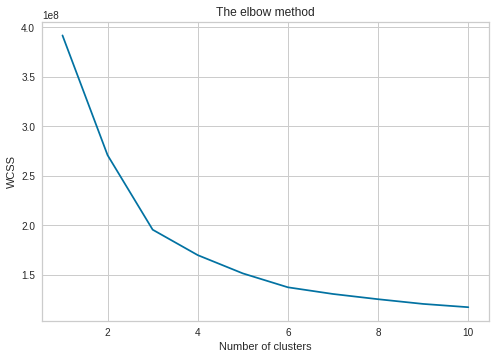

In [96]:
plt.plot(range(1, tope_range), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

## También utilizamos Coeficiente de Silueta (Silhouette coefficient) para visualizar otro  posible K óptimo

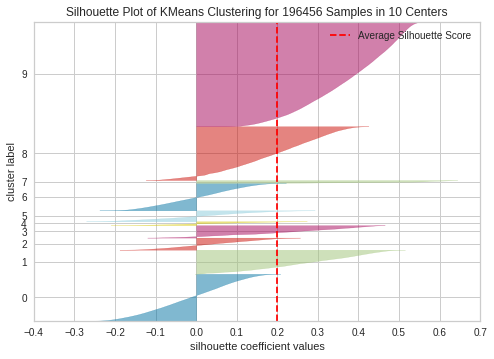

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 196456 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [97]:
model = KMeans(k_cluster)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(numeric_df)   
visualizer.show() 

## Decidimos utilizar 3 clusters de acuerdo al método del codo.

In [98]:
k_cluster = 3

### Decidimos considerar el K que interpretamos de las gráficas, dejando comentado la opción de los coeficientes.

In [99]:
'''
silhouette_scores = []

for k in range(2, tope_range):
    model = KMeans(n_clusters=k, random_state=semilla)
    model.fit(numeric_df)
    score = silhouette_score(numeric_df, model.labels_)
    print("Silhouette Score for k = ", k, "is", score)
    silhouette_scores.append(score)

'''

'\nsilhouette_scores = []\n\nfor k in range(2, tope_range):\n    model = KMeans(n_clusters=k, random_state=semilla)\n    model.fit(numeric_df)\n    score = silhouette_score(numeric_df, model.labels_)\n    print("Silhouette Score for k = ", k, "is", score)\n    silhouette_scores.append(score)\n\n'

In [100]:
'''
plt.plot(range(2, tope_range), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette score')
plt.savefig('silhouette plot.png')

'''

"\nplt.plot(range(2, tope_range), silhouette_scores, marker='o')\nplt.xlabel('Number of clusters (K)')\nplt.ylabel('Silhouette score')\nplt.savefig('silhouette plot.png')\n\n"

In [101]:
# Aplicamos el algoritmo de k-means
kmeans = KMeans(n_clusters=k_cluster, random_state=semilla).fit(numeric_df)

In [102]:
# Miramos cuántas observaciones
cluster_sizes = np.bincount(kmeans.labels_)
print(cluster_sizes)

[143828  23989  28639]


In [103]:
# Miramos los centroides de cada uno de los clusters
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)

[[6.48582118e+00 2.00018238e+01 1.50593577e+01 3.12105718e-01
  9.64921056e-01 4.31407334e-01 1.01092743e-01 4.66769634e-01
  9.93127790e-01 1.32065294e+00 2.99910569e-01 9.13388663e-01
  2.48810085e-01 2.29688386e-01 1.74770729e-01 1.23358755e-02
  1.68396582e-02 2.22164583e+00 1.16455554e+00 2.77393875e+00
  5.60928262e-01 2.79746770e+00 1.20205373e+00 5.39753160e-02
  1.55392541e+00 6.81041207e-01 2.63643289e+00 9.21753249e-01
  1.20195410e+00 6.67114391e-02 1.08743090e+00 3.29963322e+00]
 [1.96174877e+01 7.58531993e+01 2.08846795e+01 5.37272146e-01
  3.79745169e+00 1.99791623e+00 6.30750422e-01 1.75365063e+00
  1.75232147e+00 2.52030697e+00 8.48092767e-01 4.00954768e+00
  9.12757620e-02 9.54140868e-01 6.32887465e-01 3.00181930e-02
  6.18554144e-02 4.34633658e+00 2.49401510e+00 6.09945460e+00
  2.42923598e+00 1.38833062e+01 3.66374954e+00 1.39489379e-01
  8.23897777e+00 4.17418467e+00 1.47293989e+01 4.15321795e+00
  6.38522519e+00 2.76925454e-01 5.21317027e-01 8.66403329e+00]
 [7.65

In [104]:
# Miramos la distribución de las observaciones clusterizadas
cluster_labels = kmeans.labels_
print(cluster_labels)

[0 0 0 ... 1 1 1]


In [105]:
# Calculamos el promedio de cada variable cuantitativa del dataset
promedio = numeric_df.mean()
print(promedio)

qty_total_products                    8.26
total_amount                         27.33
order_count_usu                      26.02
BWS_qty                               0.35
Dairy / Chilled / Eggs_qty            1.35
Home / Pet_qty                        0.65
Meat / Seafood_qty                    0.18
Produce_qty                           0.66
Beverages_qty                         1.10
Snacks_qty                            1.44
Frozen_qty                            0.36
Packaged Foods_qty                    1.32
Smoking / Tobacco_qty                 0.24
Personal Care / Baby / Health_qty     0.32
Bread / Bakery_qty                    0.24
General Merchandise_qty               0.01
Ready To Consume_qty                  0.02
cant_cat_L1                           2.52
peso_BWS                              1.34
peso_Beverages                        3.21
peso_Bread / Bakery                   0.80
peso_Dairy / Chilled / Eggs           4.27
peso_Frozen                           1.48
peso_Genera

In [106]:
len(cluster_sizes)

3

In [107]:
# Calculamos los promedios de cada cluster de cada una de las variables
cluster0 = numeric_df.loc[cluster_labels == 0].mean()
cluster1 = numeric_df.loc[cluster_labels == 1].mean()
cluster2 = numeric_df.loc[cluster_labels == 2].mean()

'''
cluster3 = numeric_df.loc[cluster_labels == 3].mean()
cluster4 = numeric_df.loc[cluster_labels == 4].mean()
cluster5 = numeric_df.loc[cluster_labels == 5].mean()
'''

'\ncluster3 = numeric_df.loc[cluster_labels == 3].mean()\ncluster4 = numeric_df.loc[cluster_labels == 4].mean()\ncluster5 = numeric_df.loc[cluster_labels == 5].mean()\n'

In [108]:
# Construimos un DataFrame con los promedios de cada variable por cluster y el promedio de todo el dataset
final = pd.DataFrame({'variables': numeric_df.columns, 'cluster0': cluster0, 'cluster1': cluster1,
                      'cluster2': cluster2 ,
                      'promedio': promedio}).reset_index(drop=True)

final

,variables,cluster0,cluster1,cluster2,promedio
0,qty_total_products,6.49,19.62,7.65,8.26
1,total_amount,20.00,75.86,23.49,27.33
2,order_count_usu,15.06,20.88,85.34,26.02
3,BWS_qty,0.31,0.54,0.38,0.35
4,Dairy / Chilled / Eggs_qty,0.97,3.80,1.22,1.35
5,Home / Pet_qty,0.43,2.00,0.65,0.65
6,Meat / Seafood_qty,0.10,0.63,0.22,0.18
7,Produce_qty,0.47,1.75,0.72,0.66
8,Beverages_qty,0.99,1.75,1.11,1.10
9,Snacks_qty,1.32,2.52,1.12,1.44


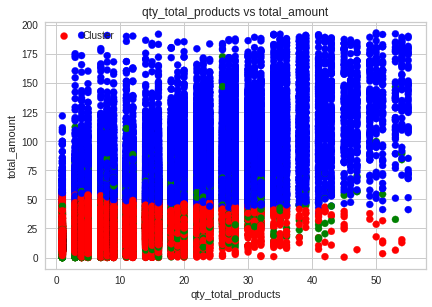

In [109]:
# Definir una paleta de colores personalizada
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'lime', 'pink', 'teal', 'brown', 'gray', 'olive', 'navy', 'salmon']


# Graficar
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.scatter(numeric_df['qty_total_products'], numeric_df['total_amount'], c=[colors[label] for label in cluster_labels])
plt.title('qty_total_products vs total_amount')
plt.xlabel('qty_total_products')
plt.ylabel('total_amount')
plt.legend(['Cluster'])

plt.show()

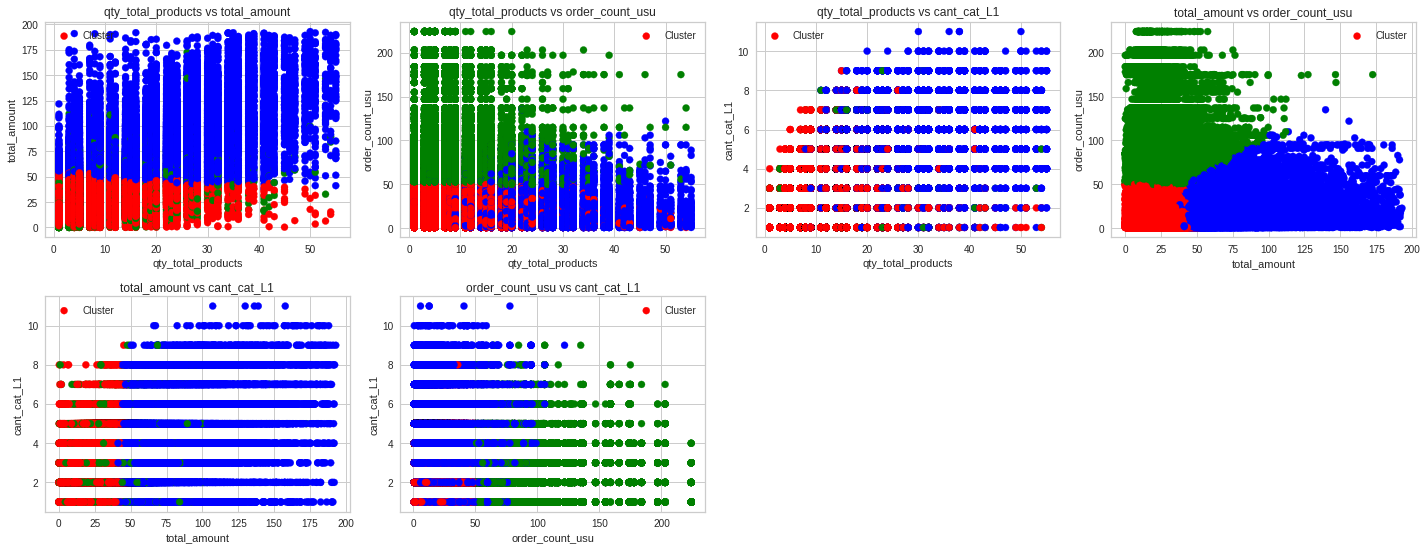

In [110]:
# Definir una paleta de colores personalizada
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'lime', 'pink', 'teal', 'brown', 'gray', 'olive', 'navy', 'salmon']

# Pares de variables a graficar
variable_pairs = [
    ('qty_total_products', 'total_amount'),
    ('qty_total_products', 'order_count_usu'),
    ('qty_total_products', 'cant_cat_L1'),
    ('total_amount', 'order_count_usu'),
    ('total_amount', 'cant_cat_L1'),
    ('order_count_usu', 'cant_cat_L1'),

   
]

# Graficar cada par de variables
plt.figure(figsize=(20, 15))

for i, (var1, var2) in enumerate(variable_pairs):
    plt.subplot(4, 4, i + 1)
    plt.scatter(numeric_df[var1], numeric_df[var2], c=[colors[label] for label in cluster_labels])
    plt.title(f'{var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.legend(['Cluster'])

plt.tight_layout()
plt.show()

In [111]:
df_otras

,order_id,weekday,user_id,has_discount,level_one,frec_compra_usu,es_fin_de_semana,periodo_dia
0,MtfRP1Q+Xx1Ox1JYEexxu7x9EOq7KfccMf+PdfY64n4=,Thursday,SwE0/imkcz2Ws75JXdlGR117JNK3BiFLkwMkrJLbZbo=,False,Smoking / Tobacco,Baja,False,Vespertino
1,GfUKK9Bh5wBGg+XJuy1E3yYr9kQ4GH+X1EVLe6YbzTg=,Tuesday,Sww2v+mY8dtWiMEtMPIEQLAkitFKxKZ0n+84SPBeEG4=,False,Beverages,Baja,False,Nocturno
2,KH4S+lzxCMKHd6UUOiIo7DuLlDaufLd3raqSHBeibAg=,Wednesday,Sx+OBqNkMZTtqkk7VUjbNa6brwNBsUzbjhLKFMz8yvM=,False,Beverages,Media,False,Nocturno
3,GdvT/R8JqkIOzSzfwVrVag6okmBzO0ms88KxgAseht8=,Saturday,Sx+OBqNkMZTtqkk7VUjbNa6brwNBsUzbjhLKFMz8yvM=,False,Smoking / Tobacco,Media,True,Nocturno
4,jHBgND7nb06oC1b6Ky6aqdqR0bWIKvaBYKMnNrrzaaQ=,Tuesday,Sx+s37QMSYEPCq+aeUFvWfJW87qJUZIEFmM4iqy5MXo=,False,Packaged Foods,Baja,False,Vespertino
...,...,...,...,...,...,...,...,...
860979,Ppsk/1iIoA++xYkWnLd0pAz9xnGqy/pStEmwX7hBfSY=,Wednesday,Ob2zUnYtV93bePpU43mfNRfyT3TOvZS/0xItVGz1rj8=,True,Produce,Alta,False,Matutino
861007,aFJuTDgA5K4j8CGuZIvhcPL2FEs6Umsj9mMO1eGr6Vo=,Sunday,Qo7XOwW3phLImqmhdtTfbeWqJtnd6M+Vwfdcx8bBPT4=,True,Produce,Alta,True,Nocturno
861037,MF2dm3i2fs87y04GYfIJ60pZJCwQ5nn02labBd03B+k=,Saturday,S0Cb9TupUCxJ8GGEz5IYMKmnHJfaNNXGmSPpI2pAuHA=,True,Packaged Foods,Media,True,Vespertino
861062,xHcIBn68bgDJbVcgOGxrnza6eiRl2TDhfbTjXLz2zGQ=,Friday,Bode5766jynMCiSW9lhAiNaGRNfGscGezXnecnLHM5Q=,True,Beverages,Alta,False,Matutino


In [112]:
# Miramos la distribución de las observaciones clusterizadas 
cluster_labels = kmeans.labels_
print(cluster_labels)

[0 0 0 ... 1 1 1]


In [113]:
# Asegurémonos de que cluster_labels sea una serie de pandas
cluster_labels = pd.Series(cluster_labels)

In [114]:
# Verifiquemos la dimensión de cluster_labels (debería ser 1)
print("Dimensiones de cluster_labels:", cluster_labels.ndim)

Dimensiones de cluster_labels: 1


In [115]:
# Verifiquemos las primeras filas para asegurarnos de que los datos son correctos
cluster_labels

0         0
1         0
2         0
3         0
4         0
         ..
196451    1
196452    1
196453    1
196454    1
196455    1
Length: 196456, dtype: int32

In [116]:
# Definimos las columnas categóricas que queremos analizar
columnas_categoricas = ['weekday', 'has_discount', 'frec_compra_usu', 'es_fin_de_semana', 'periodo_dia']

# Filtramos el DataFrame original para incluir solo las columnas categóricas
df_categoricas = df_otras[columnas_categoricas].copy()

# Añadimos cluster_labels como una columna adicional al DataFrame df_categoricas
df_categoricas['cluster_label'] = cluster_labels.values

In [117]:
# Calculamos la tabla de frecuencias cruzadas entre las columnas categóricas y cluster_label 
cluster_class_freq = pd.crosstab(index=df_categoricas['cluster_label'], columns=df_categoricas['weekday'])

# Imprimimos el resultado
cluster_class_freq

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
cluster_label,,,,,,,
0,20616,19882,21813,21827,19196,20797,19697
1,3462,3333,3836,3076,3418,3597,3267
2,4217,4069,4052,3683,4112,4304,4202


In [118]:
# Calculamos la tabla de frecuencias cruzadas entre las columnas categóricas y cluster_label 
cluster_class_freq = pd.crosstab(index=df_categoricas['cluster_label'], columns=df_categoricas['has_discount'])

# Imprimimos el resultado
cluster_class_freq

has_discount,False,True
cluster_label,,
0,58519,85309
1,4554,19435
2,7477,21162


In [119]:
# Calculamos la tabla de frecuencias cruzadas entre las columnas categóricas y cluster_label 
cluster_class_freq = pd.crosstab(index=df_categoricas['cluster_label'], columns=df_categoricas['frec_compra_usu'])

# Imprimimos el resultado
cluster_class_freq

frec_compra_usu,Alta,Baja,Media
cluster_label,,,
0,88283,32109,23436
1,18188,2571,3230
2,28639,0,0


In [120]:
# Calculamos la tabla de frecuencias cruzadas entre las columnas categóricas y cluster_label 
cluster_class_freq = pd.crosstab(index=df_categoricas['cluster_label'], columns=df_categoricas['es_fin_de_semana'])

# Imprimimos el resultado
cluster_class_freq

es_fin_de_semana,False,True
cluster_label,,
0,100188,43640
1,17077,6912
2,20904,7735


In [121]:
# Calculamos la tabla de frecuencias cruzadas entre las columnas categóricas y cluster_label 
cluster_class_freq = pd.crosstab(index=df_categoricas['cluster_label'], columns=df_categoricas['periodo_dia'])

# Imprimimos el resultado
cluster_class_freq

periodo_dia,Matutino,Nocturno,Vespertino
cluster_label,,,
0,20688,71283,51857
1,4676,8944,10369
2,5667,12216,10756


# K-medoids clustering (PAM)

In [173]:
k_cluster = 3

In [174]:
df_muestra = df.sample(n=10000, random_state=semilla)

In [175]:
columns_to_drop = [
    'BWS',
    'Beverages',
    'Bread / Bakery',
    'Dairy / Chilled / Eggs',
    'Frozen',
    'General Merchandise',
    'Home / Pet',
    'Meat / Seafood',
    'Packaged Foods',
    'Personal Care / Baby / Health',
    'Produce',
    'Ready To Consume',
    'Smoking / Tobacco',
    'Snacks'
]

df_muestra = df_muestra.drop(columns=columns_to_drop)

df_muestra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 370074 to 52364
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   order_id                            10000 non-null  object  
 1   weekday                             10000 non-null  category
 2   hour                                10000 non-null  int64   
 3   user_id                             10000 non-null  object  
 4   qty_total_products                  10000 non-null  int64   
 5   total_amount                        10000 non-null  float64 
 6   has_discount                        10000 non-null  category
 7   level_one                           10000 non-null  object  
 8   order_count_usu                     10000 non-null  int64   
 9   frec_compra_usu                     10000 non-null  category
 10  es_fin_de_semana                    10000 non-null  category
 11  periodo_dia            

In [176]:
df_gower = df_muestra.copy()

In [177]:
df_gower.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 370074 to 52364
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   order_id                            10000 non-null  object  
 1   weekday                             10000 non-null  category
 2   hour                                10000 non-null  int64   
 3   user_id                             10000 non-null  object  
 4   qty_total_products                  10000 non-null  int64   
 5   total_amount                        10000 non-null  float64 
 6   has_discount                        10000 non-null  category
 7   level_one                           10000 non-null  object  
 8   order_count_usu                     10000 non-null  int64   
 9   frec_compra_usu                     10000 non-null  category
 10  es_fin_de_semana                    10000 non-null  category
 11  periodo_dia            

In [178]:
df_gower = df_gower.drop(['order_id','user_id','level_one'], axis=1)

In [179]:
df_gower_2 = df_gower.copy()

In [180]:
# Convierte las columnas categóricas a tipo string
for col in df_gower_2.select_dtypes(['category']).columns:
    df_gower_2.loc[:, col] = df_gower_2[col].astype(str)

In [181]:
df_gower_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 370074 to 52364
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   weekday                             10000 non-null  object 
 1   hour                                10000 non-null  int64  
 2   qty_total_products                  10000 non-null  int64  
 3   total_amount                        10000 non-null  float64
 4   has_discount                        10000 non-null  object 
 5   order_count_usu                     10000 non-null  int64  
 6   frec_compra_usu                     10000 non-null  object 
 7   es_fin_de_semana                    10000 non-null  object 
 8   periodo_dia                         10000 non-null  object 
 9   BWS_qty                             10000 non-null  float64
 10  Dairy / Chilled / Eggs_qty          10000 non-null  float64
 11  Home / Pet_qty                      

In [182]:
# Seleccionar las columnas numéricas
numerical_cols = df_gower_2.select_dtypes(include=['float64', 'int64']).columns

# Escalar las columnas numéricas usando scale de sklearn
df_gower_2[numerical_cols] = scale(df_gower_2[numerical_cols])

In [183]:
df_gower_2.shape

(10000, 38)

In [184]:
dist_gower = gower.gower_matrix(df_gower_2)

In [185]:
# Configurar el algoritmo K-medioids
kmedoids = KMedoids(n_clusters=k_cluster, random_state=semilla)

# Ajustar el modelo K-medioids a los datos
km = kmedoids.fit(dist_gower)

# Obtener los labels (clusters asignados a cada punto)
labels = km.labels_

# Obtener los centroides
centroids = km.medoid_indices_

# Resultados
print("Cluster labels:", labels)

# Resultados
print("Cluster centroids:", centroids)


Cluster labels: [1 0 2 ... 0 0 2]
Cluster centroids: [1824 4111 5282]


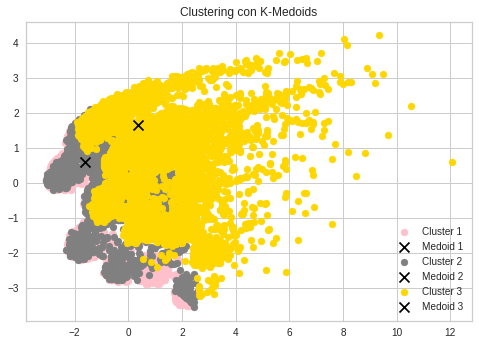

In [198]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(dist_gower)

colors = ['pink', 'gray', 'gold', 'olive', 'teal']
for i in range(k_cluster):
    cluster_points = X_pca[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {i+1}')
    plt.scatter(X_pca[centroids[i], 0], X_pca[centroids[i], 1], marker='x', color='black', s=100, label=f'Medoid {i+1}')

plt.title('Clustering con K-Medoids')
plt.legend()
plt.grid(True)
plt.show()